# Importing Dependencies

In [1]:
import os
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgo2AvFmwzYLwu3LDUWjmzVRiul7GPmsTdzRN5nnsfiWkvK3wlrdK4
Mounted at /content/drive


# Dataset Preparation

In [2]:
if not os.path.exists(os.getcwd() + "/Data"):
    os.mkdir(os.getcwd() + "/Data")
shutil.copyfile(os.getcwd() + "/drive/MyDrive/Intern Telkom DDB/Project/Data/rpa-billing-result_100k_2021_01_01.csv",
                os.getcwd() + "/Data/rpa-billing-result_100k_2021_01_01.csv")

'/content/Data/rpa-billing-result_100k_2021_01_01.csv'

In [3]:
df = pd.read_csv(os.getcwd() + "/Data/rpa-billing-result_100k_2021_01_01.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,9,10,11,12,13,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

In [5]:
df = df[["number", "gladius.paketradius",
         "billing_11_period", "billing_11_amountTotal", "billing_11_status", "billing_11_paymentDate", "billing_11_paymentTime", "billing_11_channel",
         "billing_10_period", "billing_10_amountTotal", "billing_10_status", "billing_10_paymentDate", "billing_10_paymentTime", "billing_10_channel",
         "billing_9_period", "billing_9_amountTotal", "billing_9_status", "billing_9_paymentDate", "billing_9_paymentTime", "billing_9_channel",
         "billing_8_period", "billing_8_amountTotal", "billing_8_status", "billing_8_paymentDate", "billing_8_paymentTime", "billing_8_channel",
         "billing_7_period", "billing_7_amountTotal", "billing_7_status", "billing_7_paymentDate", "billing_7_paymentTime", "billing_7_channel",
         "billing_6_period", "billing_6_amountTotal", "billing_6_status", "billing_6_paymentDate", "billing_6_paymentTime", "billing_6_channel",
         "billing_5_period", "billing_5_amountTotal", "billing_5_status", "billing_5_paymentDate", "billing_5_paymentTime", "billing_5_channel",
         "billing_4_period", "billing_4_amountTotal", "billing_4_status", "billing_4_paymentDate", "billing_4_paymentTime", "billing_4_channel",
         "billing_3_period", "billing_3_amountTotal", "billing_3_status", "billing_3_paymentDate", "billing_3_paymentTime", "billing_3_channel",
         "billing_2_period", "billing_2_amountTotal", "billing_2_status", "billing_2_paymentDate", "billing_2_paymentTime", "billing_2_channel",
         "billing_1_period", "billing_1_amountTotal", "billing_1_status", "billing_1_paymentDate", "billing_1_paymentTime", "billing_1_channel",
         "gladius.nd", "gladius.portbinding", "gladius.statusnomor", "gladius.statusport", "last_connection_days", "samnas.service_name", "samnas.start_date","samnas.end_date", "session_start", "quota", "sisa", "usage_download", "usage_upload"]]

In [6]:
# Count data each WITEL
j = 1
for i in range(len(df["billing_{}_status".format(j)].unique())):
    print(df["billing_{}_status".format(j)].unique()[i], ":", df.loc[df["billing_{}_status".format(j)] == df["billing_{}_status".format(j)].unique()[i]].count()[i])

PAID : 44558
CT0 : 44601
UNPAID : 5561
PARTIAL : 776
ZERO BILLING : 414
nan : 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99997 entries, 0 to 99996
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  99997 non-null  int64  
 1   gladius.paketradius     91907 non-null  object 
 2   billing_11_period       79489 non-null  float64
 3   billing_11_amountTotal  79303 non-null  object 
 4   billing_11_status       79489 non-null  object 
 5   billing_11_paymentDate  79472 non-null  float64
 6   billing_11_paymentTime  79472 non-null  float64
 7   billing_11_channel      79338 non-null  object 
 8   billing_10_period       87577 non-null  float64
 9   billing_10_amountTotal  87358 non-null  object 
 10  billing_10_status       87577 non-null  object 
 11  billing_10_paymentDate  87569 non-null  float64
 12  billing_10_paymentTime  87569 non-null  float64
 13  billing_10_channel      87405 non-null  object 
 14  billing_9_period        93123 non-null

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number,99997.0,1.417589e+11,2.235031e+10,1.111011e+11,1.222022e+11,1.415551e+11,1.624019e+11,1.796152e+11
billing_11_period,79489.0,2.020122e+05,4.461267e+00,2.017050e+05,2.020120e+05,2.020120e+05,2.020120e+05,2.021010e+05
billing_11_paymentDate,79472.0,2.020149e+07,1.524852e+03,2.020113e+07,2.020122e+07,2.020122e+07,2.020122e+07,2.021103e+07
billing_11_paymentTime,79472.0,1.399028e+05,4.746894e+04,4.320000e+02,1.014570e+05,1.403575e+05,1.826412e+05,2.357030e+05
billing_10_period,87577.0,2.020977e+05,1.680799e+01,2.018060e+05,2.021010e+05,2.021010e+05,2.021010e+05,2.021020e+05
billing_10_paymentDate,87569.0,2.020986e+07,1.504292e+03,2.020113e+07,2.021012e+07,2.021012e+07,2.021012e+07,2.021103e+07
billing_10_paymentTime,87569.0,1.379278e+05,4.648028e+04,9.210000e+02,1.011340e+05,1.346390e+05,1.802030e+05,2.357280e+05
billing_9_period,93123.0,2.021014e+05,7.286038e+00,2.019070e+05,2.021020e+05,2.021020e+05,2.021020e+05,2.021030e+05
billing_9_paymentDate,93117.0,2.021018e+07,6.249778e+02,2.020113e+07,2.021022e+07,2.021022e+07,2.021022e+07,2.021103e+07
billing_9_paymentTime,93117.0,1.393253e+05,4.682958e+04,5.800000e+01,1.016240e+05,1.359380e+05,1.815360e+05,2.358580e+05


In [9]:
df

,number,gladius.paketradius,billing_11_period,billing_11_amountTotal,billing_11_status,billing_11_paymentDate,billing_11_paymentTime,billing_11_channel,billing_10_period,billing_10_amountTotal,billing_10_status,billing_10_paymentDate,billing_10_paymentTime,billing_10_channel,billing_9_period,billing_9_amountTotal,billing_9_status,billing_9_paymentDate,billing_9_paymentTime,billing_9_channel,billing_8_period,billing_8_amountTotal,billing_8_status,billing_8_paymentDate,billing_8_paymentTime,billing_8_channel,billing_7_period,billing_7_amountTotal,billing_7_status,billing_7_paymentDate,billing_7_paymentTime,billing_7_channel,billing_6_period,billing_6_amountTotal,billing_6_status,billing_6_paymentDate,billing_6_paymentTime,billing_6_channel,billing_5_period,billing_5_amountTotal,...,billing_5_paymentDate,billing_5_paymentTime,billing_5_channel,billing_4_period,billing_4_amountTotal,billing_4_status,billing_4_paymentDate,billing_4_paymentTime,billing_4_channel,billing_3_period,billing_3_amountTotal,billing_3_status,billing_3_paymentDate,billing_3_paymentTime,billing_3_channel,billing_2_period,billing_2_amountTotal,billing_2_status,billing_2_paymentDate,billing_2_paymentTime,billing_2_channel,billing_1_period,billing_1_amountTotal,billing_1_status,billing_1_paymentDate,billing_1_paymentTime,billing_1_channel,gladius.nd,gladius.portbinding,gladius.statusnomor,gladius.statusport,last_connection_days,samnas.service_name,samnas.start_date,samnas.end_date,session_start,quota,sisa,usage_download,usage_upload
0,131177120756,INETNLOY10,202012.0,"344.000,00",PAID,20201217.0,164344.0,FINNET BANK - BANK CENTRAL ASIA,202101.0,"341.000,00",PAID,20210115.0,112813.0,FINNET BANK - BANK CENTRAL ASIA,202102.0,"341.000,00",PAID,20210216.0,161843.0,FINNET BANK - BANK CENTRAL ASIA,202103.0,"341.000,00",PAID,20210316.0,161636.0,FINNET BANK - BANK CENTRAL ASIA,202104.0,"341.000,00",PAID,20210416.0,91139.0,FINNET BANK - BANK CENTRAL ASIA,202105.0,"341.000,00",PAID,20210517.0,162151.0,FINNET BANK - BANK CENTRAL ASIA,202106.0,"341.000,00",...,20210618.0,113136.0,FINNET BANK - BANK CENTRAL ASIA,202107.0,"341.000,00",PAID,20210713.0,104622.0,FINNET BANK - BANK CENTRAL ASIA,202108.0,"341.000,00",PAID,20210819.0,105030.0,FINNET BANK - BANK CENTRAL ASIA,202109.0,"341.000,00",PAID,20211018.0,155946.0,FINNET BANK - BANK CENTRAL ASIA,202110.0,"341.000,00",PAID,20211018.0,155946.0,FINNET BANK - BANK CENTRAL ASIA,1.311771e+11,GPON10-D3-RJW-2 xpon 0/7/0/13:6.3.200,enable,enable,0,-,-,-,2021-11-01 03:49:45,350.000000,345.81,1.46 GB,317.37 MB
1,131177105296,INETLOY20,202012.0,"327.500,00",PAID,20201217.0,141735.0,FINNET SUBCA - TOKOPEDIA,202101.0,"324.500,00",PAID,20210117.0,220950.0,FINNET SUBCA - TOKOPEDIA,202102.0,"324.500,00",PAID,20210218.0,91347.0,FINNET SUBCA - TOKOPEDIA,202103.0,"324.500,00",PAID,20210318.0,140634.0,FINNET SUBCA - TOKOPEDIA,202104.0,"324.500,00",PAID,20210419.0,84944.0,FINNET SUBCA - TOKOPEDIA,202105.0,"324.500,00",PAID,20210518.0,83904.0,FINNET SUBCA - TOKOPEDIA,202106.0,"339.250,00",...,20210621.0,65716.0,FINNET SUBCA - TOKOPEDIA,202107.0,"324.500,00",PAID,20210719.0,65627.0,FINNET SUBCA - TOKOPEDIA,202108.0,"324.500,00",PAID,20210821.0,63220.0,FINNET BANK - BANK CENTRAL ASIA,202109.0,NaN,UNPAID,NaN,NaN,NaN,202110.0,NaN,CT0,NaN,NaN,NaN,1.311771e+11,GPON13-D3-RJW-2 xpon 0/8/0/9:10.3.200,disable,enable,41,ISOLIRAN,20210927002447,20371231235959,2021-09-21 03:47:11,750.000000,750.00,776.02 MB,702.54 MB
2,131167100072,INETSSQ20,202012.0,"145.145,00",PAID,20201208.0,200459.0,FINNET BANK - BANK MANDIRI,202101.0,"146.355,00",PAID,20210105.0,214430.0,FINNET BANK - BANK MANDIRI,202102.0,"143.385,00",PAID,20210205.0,214735.0,FINNET BANK - BANK MANDIRI,202103.0,"143.385,00",PAID,20210305.0,215315.0,FINNET BANK - BANK MANDIRI,202104.0,"143.715,00",PAID,20210405.0,215609.0,FINNET BANK - BANK MANDIRI,202105.0,"143.385,00",PAID,20210505.0,215736.0,FINNET BANK - BANK MANDIRI,202106.0,"143.385,00",...,20210608.0,194914.0,FINNET BANK - BANK MANDIRI,202107.0,"143

# Dataset Preprocessing

## Preprocessing

In [10]:
# Drop 21 data
df = df.drop(df.loc[(df["billing_1_status"] == "CT0") & (df["billing_2_status"] != "UNPAID")].index)
df = df.reset_index(drop = True)

# Drop 91 data
df = df.drop(df.loc[(df["billing_1_status"] == "ZERO BILLING") &
                    (df["billing_2_status"] == "ZERO BILLING") &
                    (df["billing_3_status"] == "ZERO BILLING") &
                    (df["billing_4_status"] == "ZERO BILLING") &
                    (df["billing_5_status"] == "ZERO BILLING") &
                    (df["billing_6_status"] == "ZERO BILLING") &
                    (df["billing_7_status"] == "ZERO BILLING") &
                    (df["billing_8_status"] == "ZERO BILLING") &
                    (df["billing_9_status"] == "ZERO BILLING") &
                    (df["billing_10_status"] == "ZERO BILLING") &
                    (df["billing_11_status"] == "ZERO BILLING")].index)
df = df.reset_index(drop = True)

# Drop 1624 data
df = df.drop(df.loc[(df["billing_1_status"] == "CT0") & (df["samnas.service_name"] != "ISOLIRAN")].index)
df = df.reset_index(drop = True)

# Drop 2840 data
df = df.drop(df.loc[(df["billing_1_status"] == "PARTIAL") |
                    (df["billing_2_status"] == "PARTIAL") | 
                    (df["billing_3_status"] == "PARTIAL") | 
                    (df["billing_4_status"] == "PARTIAL") | 
                    (df["billing_5_status"] == "PARTIAL") | 
                    (df["billing_6_status"] == "PARTIAL") | 
                    (df["billing_7_status"] == "PARTIAL") | 
                    (df["billing_8_status"] == "PARTIAL") | 
                    (df["billing_9_status"] == "PARTIAL") | 
                    (df["billing_10_status"] == "PARTIAL") | 
                    (df["billing_11_status"] == "PARTIAL")].index)
df = df.reset_index(drop = True)

# Fill NaN value with 0 or "-"
for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df["billing_{}_status".format(month)].loc[df["billing_{}_status".format(month)].isnull()] = "ZERO BILLING" # CHECK AGAIN
    df["billing_{}_period".format(month)].loc[df["billing_{}_period".format(month)].isnull()] = 0 # CHECK AGAIN
    df["billing_{}_paymentDate".format(month)].loc[df["billing_{}_paymentDate".format(month)].isnull()] = 0 # CHECK AGAIN
    df[["billing_{}_paymentDate".format(month)]] = df[["billing_{}_paymentDate".format(month)]].astype(float).astype(int)
    df[["billing_{}_amountTotal".format(month)]] = df["billing_{}_amountTotal".format(month)].apply(lambda x: float(str(x).replace(".", "").replace(",", ".")))
    df[["billing_{}_amountTotal".format(month)]] = df["billing_{}_amountTotal".format(month)].apply(lambda x: -1 * x if x < 0 else x)
    df["billing_{}_amountTotal".format(month)].loc[df["billing_{}_amountTotal".format(month)].isnull()] = 0 # CHECK AGAIN
    df[["billing_{}_paymentDate".format(month)]] = df["billing_{}_paymentDate".format(month)].apply(lambda x: int(str(x)[-2:]))
    df["billing_{}_paymentTime".format(month)].loc[df["billing_{}_paymentTime".format(month)].isnull()] = 0 # CHECK AGAIN
    df["billing_{}_channel".format(month)].loc[df["billing_{}_channel".format(month)].isnull()] = "-" # CHECK AGAIN
df["gladius.nd"].loc[df["gladius.nd"].isnull()] = 0 # CHECK AGAIN
df["gladius.paketradius"].loc[df["gladius.paketradius"].isnull()] = "-" # CHECK AGAIN
df["gladius.portbinding"].loc[df["gladius.portbinding"].isnull()] = "-" # CHECK AGAIN
df["gladius.statusnomor"].loc[df["gladius.statusnomor"].isnull()] = "-" # CHECK AGAIN
df["gladius.statusport"].loc[df["gladius.statusport"].isnull()] = "-" # CHECK AGAIN
df["session_start"].loc[df["session_start"].isnull()] = "-" # CHECK AGAIN
df["usage_download"].loc[df["usage_download"].isnull()] = "-" # CHECK AGAIN
df["usage_upload"].loc[df["usage_upload"].isnull()] = "-" # CHECK AGAIN

# Fill missing value samnas.service_name == "ISOLIRAN" when gladius.statusnomor == "isolir" and gladius.statusnomo == "isolir" when samnas.service_name == "ISOLIRAN"
#df["samnas.service_name"].loc[(df["gladius.statusnomor"] == "isolir") & (df["samnas.service_name"] == "-")] = "ISOLIRAN" # CHECK AGAIN
#df["gladius.statusnomor"].loc[(df["gladius.statusnomor"] == "-") & (df["samnas.service_name"] == "ISOLIRAN")] = "isolir" # CHECK AGAIN

# Create New Feature
'''
df["count_paid"] = (df[["billing_12_status", 
                        "billing_11_status",
                        "billing_10_status",
                        "billing_9_status",
                        "billing_8_status",
                        "billing_7_status",
                        "billing_6_status",
                        "billing_5_status",
                        "billing_4_status",
                        "billing_3_status",
                        "billing_2_status",
                        "billing_1_status"]] == "PAID").sum(axis = 1).values
df["count_unpaid"] = (df[["billing_12_status", 
                        "billing_11_status",
                        "billing_10_status",
                        "billing_9_status",
                        "billing_8_status",
                        "billing_7_status",
                        "billing_6_status",
                        "billing_5_status",
                        "billing_4_status",
                        "billing_3_status",
                        "billing_2_status",
                        "billing_1_status"]] == "UNPAID").sum(axis = 1).values
df["count_partial"] = (df[["billing_12_status", 
                        "billing_11_status",
                        "billing_10_status",
                        "billing_9_status",
                        "billing_8_status",
                        "billing_7_status",
                        "billing_6_status",
                        "billing_5_status",
                        "billing_4_status",
                        "billing_3_status",
                        "billing_2_status",
                        "billing_1_status"]] == "PARTIAL").sum(axis = 1).values
df["count_zero_billing"] = (df[["billing_12_status", 
                        "billing_11_status",
                        "billing_10_status",
                        "billing_9_status",
                        "billing_8_status",
                        "billing_7_status",
                        "billing_6_status",
                        "billing_5_status",
                        "billing_4_status",
                        "billing_3_status",
                        "billing_2_status",
                        "billing_1_status"]] == "ZERO BILLING").sum(axis = 1).values
df["count_ct0"] = (df[["billing_12_status", 
                        "billing_11_status",
                        "billing_10_status",
                        "billing_9_status",
                        "billing_8_status",
                        "billing_7_status",
                        "billing_6_status",
                        "billing_5_status",
                        "billing_4_status",
                        "billing_3_status",
                        "billing_2_status",
                        "billing_1_status"]] == "CT0").sum(axis = 1).values
'''

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


'\ndf["count_paid"] = (df[["billing_12_status", \n                        "billing_11_status",\n                        "billing_10_status",\n                        "billing_9_status",\n                        "billing_8_status",\n                        "billing_7_status",\n                        "billing_6_status",\n                        "billing_5_status",\n                        "billing_4_status",\n                        "billing_3_status",\n                        "billing_2_status",\n                        "billing_1_status"]] == "PAID").sum(axis = 1).values\ndf["count_unpaid"] = (df[["billing_12_status", \n                        "billing_11_status",\n                        "billing_10_status",\n                        "billing_9_status",\n                        "billing_8_status",\n                        "billing_7_status",\n                        "billing_6_status",\n                        "billing_5_status",\n                        "billing_4_status",\n         

In [ ]:
df

In [12]:
df["gladius.paketradius"].unique()

array(['INETNLOY10', 'INETLOY20', 'INETSSQ20', 'INET10Q10', 'INETNLOY20',
       'INET10Q050', 'INET10Q50', 'INETSSQ100', 'INETNLOY50', 'INETF20M',
       'INETNLOY30', 'INETF10M', 'INETF30M', '-', 'INETSSQ5',
       'INETNLOY100', 'INET10Q20', 'INETR5M', 'INETNLOYL20', 'INETMBQ50',
       'INET10Q100', 'INETLOY40', 'INETFL20M', 'INETLOY30', 'INETFL10M',
       'INETR10M', 'INETMBSP10', 'INET SOD', 'INETF40M', 'INETR20M',
       'INETR512K', 'INETNLOY40', 'INETFN30M', 'INETR1M', 'INETBHOME',
       'INET U2M', 'INETF100M', 'INETG1M', 'INETF50M', 'INETNLOYL10',
       'INETG3M', 'INETNLOY200', 'INETFN20M', 'INETR2M', 'INET U3M',
       'INET U384K', 'INETR3M', 'INET U1M', 'INETLOY10', 'INET_1MB_H',
       'INETSS2M', 'INET_3MB_H', 'INET1000S', 'INETG10M', 'HSSP4',
       'INET1000H', 'INET U512R', 'INET U512K', 'INETSSQ50', 'INETLOY50',
       'INET L15H', 'INET L50H', 'INETSS1M', 'INETTBASE', 'INETSS10M',
       'INETSS3M', 'INETNLOY300', 'INETFN10M', 'INETLOY100', 'INETHYBRID',
      

# Exploratory Data Analysis

In [ ]:
df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")
df_temp["sisa_%"] = df_temp["sisa"] / df_temp["quota"]
df_temp["sisa_%"].loc[df_temp["sisa_%"].isnull()] = 1 # CHECK AGAIN
df_temp["billing_mean_paymentDate"] = df_temp[["billing_11_paymentDate",
                                               "billing_10_paymentDate",
                                               "billing_9_paymentDate",
                                               "billing_8_paymentDate",
                                               "billing_7_paymentDate",
                                               "billing_6_paymentDate",
                                               "billing_5_paymentDate",
                                               "billing_4_paymentDate",
                                               "billing_3_paymentDate",
                                               "billing_2_paymentDate"]].mean(axis = 1)

df_temp["billing_std_paymentDate"] = df_temp[["billing_11_paymentDate",
                                              "billing_10_paymentDate",
                                              "billing_9_paymentDate",
                                              "billing_8_paymentDate",
                                              "billing_7_paymentDate",
                                              "billing_6_paymentDate",
                                              "billing_5_paymentDate",
                                              "billing_4_paymentDate",
                                              "billing_3_paymentDate",
                                              "billing_2_paymentDate"]].std(axis = 1)

df_temp["billing_slope(3-1)_paymentDate"] = (df_temp["billing_1_paymentDate"] - df_temp["billing_3_paymentDate"]) / 2
df_temp["billing_slope(4-2)_paymentDate"] = (df_temp["billing_2_paymentDate"] - df_temp["billing_4_paymentDate"]) / 2

df_temp["billing_mean_amountTotal"] = df_temp[["billing_11_amountTotal",
                                               "billing_10_amountTotal",
                                               "billing_9_amountTotal",
                                               "billing_8_amountTotal",
                                               "billing_7_amountTotal",
                                               "billing_6_amountTotal",
                                               "billing_5_amountTotal",
                                               "billing_4_amountTotal",
                                               "billing_3_amountTotal",
                                               "billing_2_amountTotal"]].mean(axis = 1)

df_temp["billing_std_amountTotal"] =  df_temp[["billing_11_amountTotal",
                                               "billing_10_amountTotal",
                                               "billing_9_amountTotal",
                                               "billing_8_amountTotal",
                                               "billing_7_amountTotal",
                                               "billing_6_amountTotal",
                                               "billing_5_amountTotal",
                                               "billing_4_amountTotal",
                                               "billing_3_amountTotal",
                                               "billing_2_amountTotal"]].std(axis = 1)

df_temp["billing_slope(3-1)_amountTotal"] = (df_temp["billing_1_amountTotal"] - df_temp["billing_3_amountTotal"]) / 2
df_temp["billing_slope(4-2)_amountTotal"] = (df_temp["billing_2_amountTotal"] - df_temp["billing_4_amountTotal"]) / 2

# Drop 21 data
df_temp = df_temp.drop(df_temp.loc[((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING") & 
                     (df_temp["billing_8_status"] == "ZERO BILLING") & 
                     (df_temp["billing_7_status"] == "ZERO BILLING") & 
                     (df_temp["billing_6_status"] == "ZERO BILLING") & 
                     (df_temp["billing_5_status"] == "ZERO BILLING") & 
                     (df_temp["billing_4_status"] == "ZERO BILLING") & 
                     (df_temp["billing_3_status"] == "ZERO BILLING") & 
                     (df_temp["billing_2_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING") & 
                     (df_temp["billing_8_status"] == "ZERO BILLING") & 
                     (df_temp["billing_7_status"] == "ZERO BILLING") & 
                     (df_temp["billing_6_status"] == "ZERO BILLING") & 
                     (df_temp["billing_5_status"] == "ZERO BILLING") & 
                     (df_temp["billing_4_status"] == "ZERO BILLING") & 
                     (df_temp["billing_3_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING") & 
                     (df_temp["billing_8_status"] == "ZERO BILLING") & 
                     (df_temp["billing_7_status"] == "ZERO BILLING") & 
                     (df_temp["billing_6_status"] == "ZERO BILLING") & 
                     (df_temp["billing_5_status"] == "ZERO BILLING") & 
                     (df_temp["billing_4_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING") & 
                     (df_temp["billing_8_status"] == "ZERO BILLING") & 
                     (df_temp["billing_7_status"] == "ZERO BILLING") & 
                     (df_temp["billing_6_status"] == "ZERO BILLING") & 
                     (df_temp["billing_5_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING") & 
                     (df_temp["billing_8_status"] == "ZERO BILLING") & 
                     (df_temp["billing_7_status"] == "ZERO BILLING") & 
                     (df_temp["billing_6_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING") & 
                     (df_temp["billing_8_status"] == "ZERO BILLING") & 
                     (df_temp["billing_7_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING") & 
                     (df_temp["billing_8_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING") & 
                     (df_temp["billing_9_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING") & 
                     (df_temp["billing_10_status"] == "ZERO BILLING")) |
                    ((df_temp["billing_11_status"] == "ZERO BILLING"))].index)
df_temp = df_temp.reset_index(drop = True)

df_temp

#### Last Connection Days

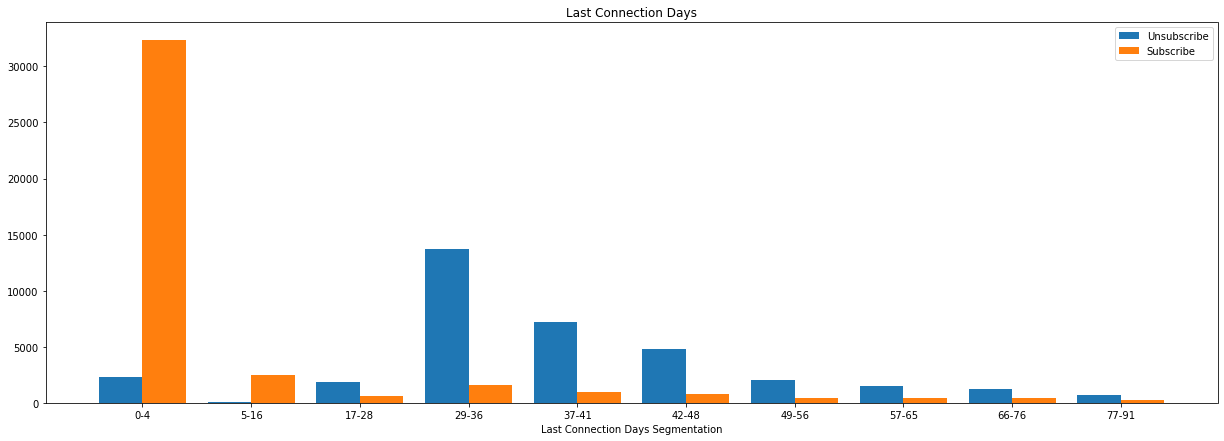

In [16]:
from sklearn.cluster import KMeans

X = df_temp[["last_connection_days"]].values
kmeans = KMeans(n_clusters = 10, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].min()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].min()[0]])
list_b = np.array([df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].max()[0],
                   df_temp[["last_connection_days"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].max()[0]])


name = ["{}-{}".format(list_a[list_a.argsort()[0]], list_b[list_b.argsort()[0]]),
        "{}-{}".format(list_a[list_a.argsort()[1]], list_b[list_b.argsort()[1]]),
        "{}-{}".format(list_a[list_a.argsort()[2]], list_b[list_b.argsort()[2]]),
        "{}-{}".format(list_a[list_a.argsort()[3]], list_b[list_b.argsort()[3]]),
        "{}-{}".format(list_a[list_a.argsort()[4]], list_b[list_b.argsort()[4]]),
        "{}-{}".format(list_a[list_a.argsort()[5]], list_b[list_b.argsort()[5]]),
        "{}-{}".format(list_a[list_a.argsort()[6]], list_b[list_b.argsort()[6]]),
        "{}-{}".format(list_a[list_a.argsort()[7]], list_b[list_b.argsort()[7]]),
        "{}-{}".format(list_a[list_a.argsort()[8]], list_b[list_b.argsort()[8]]),
        "{}-{}".format(list_a[list_a.argsort()[9]], list_b[list_b.argsort()[9]])]

valueA = [df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[5]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[6]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[7]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[8]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[9]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0]]

valueB = [df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[5]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[6]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[7]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[8]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0],
          df_temp[["last_connection_days"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[9]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["last_connection_days"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Last Connection Days Segmentation")
plt.title("Last Connection Days")
plt.legend()
plt.show()

#### Payment Date Mean

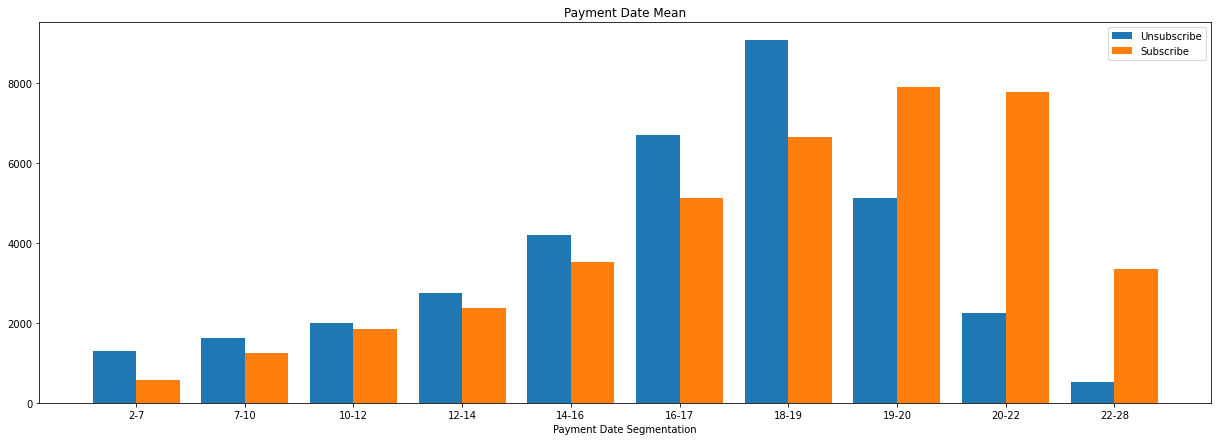

In [17]:
from sklearn.cluster import KMeans

X = df_temp[["billing_mean_paymentDate"]].values
kmeans = KMeans(n_clusters = 10, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].min()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].min()[0]])
list_b = np.array([df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].max()[0],
                   df_temp[["billing_mean_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]]), round(list_b[list_b.argsort()[0]])),
        "{}-{}".format(round(list_a[list_a.argsort()[1]]), round(list_b[list_b.argsort()[1]])),
        "{}-{}".format(round(list_a[list_a.argsort()[2]]), round(list_b[list_b.argsort()[2]])),
        "{}-{}".format(round(list_a[list_a.argsort()[3]]), round(list_b[list_b.argsort()[3]])),
        "{}-{}".format(round(list_a[list_a.argsort()[4]]), round(list_b[list_b.argsort()[4]])),
        "{}-{}".format(round(list_a[list_a.argsort()[5]]), round(list_b[list_b.argsort()[5]])),
        "{}-{}".format(round(list_a[list_a.argsort()[6]]), round(list_b[list_b.argsort()[6]])),
        "{}-{}".format(round(list_a[list_a.argsort()[7]]), round(list_b[list_b.argsort()[7]])),
        "{}-{}".format(round(list_a[list_a.argsort()[8]]), round(list_b[list_b.argsort()[8]])),
        "{}-{}".format(round(list_a[list_a.argsort()[9]]), round(list_b[list_b.argsort()[9]]))]

valueA = [df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[5]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[6]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[7]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[8]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[9]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0]]

valueB = [df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[5]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[6]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[7]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[8]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0],
          df_temp[["billing_mean_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[9]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_paymentDate"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Payment Date Segmentation")
plt.title("Payment Date Mean")
plt.legend()
plt.show()

#### Payment Date Std

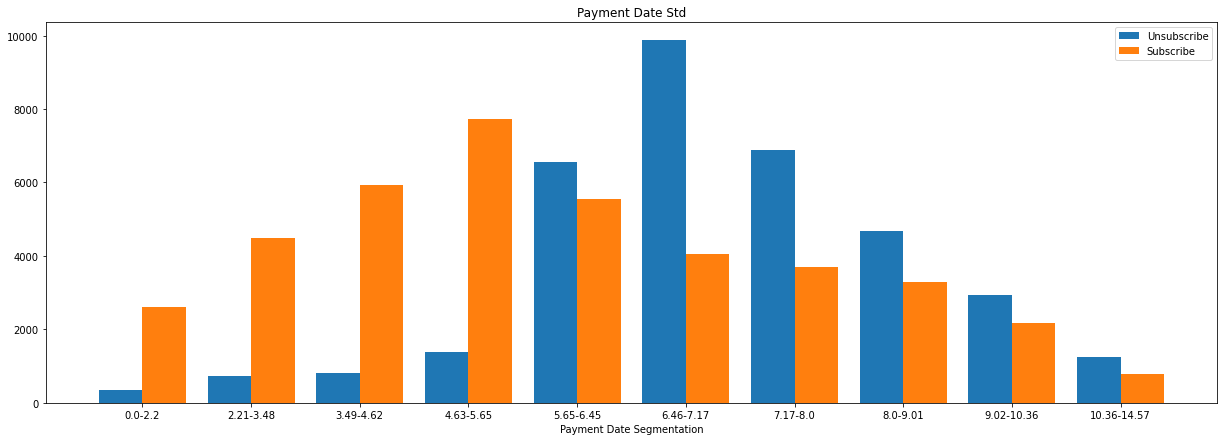

In [18]:
from sklearn.cluster import KMeans

X = df_temp[["billing_std_paymentDate"]].values
kmeans = KMeans(n_clusters = 10, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].min()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].min()[0]])
list_b = np.array([df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].max()[0],
                   df_temp[["billing_std_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]], 2), round(list_b[list_b.argsort()[0]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[1]], 2), round(list_b[list_b.argsort()[1]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[2]], 2), round(list_b[list_b.argsort()[2]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[3]], 2), round(list_b[list_b.argsort()[3]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[4]], 2), round(list_b[list_b.argsort()[4]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[5]], 2), round(list_b[list_b.argsort()[5]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[6]], 2), round(list_b[list_b.argsort()[6]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[7]], 2), round(list_b[list_b.argsort()[7]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[8]], 2), round(list_b[list_b.argsort()[8]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[9]], 2), round(list_b[list_b.argsort()[9]], 2))]

valueA = [df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[5]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[6]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[7]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[8]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[9]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0]]

valueB = [df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[5]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[6]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[7]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[8]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0],
          df_temp[["billing_std_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[9]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_paymentDate"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Payment Date Segmentation")
plt.title("Payment Date Std")
plt.legend()
plt.show()

In [19]:
print("TP : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]))
print("FP : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]))

print("TN : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]))
print("FN : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]))

TP = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]
FP = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]
FN = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]
TN = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]

print("Sensitivity : {} ".format((TN)/(TN+FP)))
print("Recall : {} ".format((TP)/(TP+FN)))
print("Precision : {} ".format((TP)/(TP+FP)))
print("Accuracy : {} ".format((TP+TN)/(TP+FP+TN+FN)))

TP : 11768 
FP : 7883 
TN : 32384 
FN : 23683 
Sensitivity : 0.8042317530484019 
Recall : 0.33195114383233193 
Precision : 0.598849931301206 
Accuracy : 0.5831110171953828 


#### Payment Date Slope

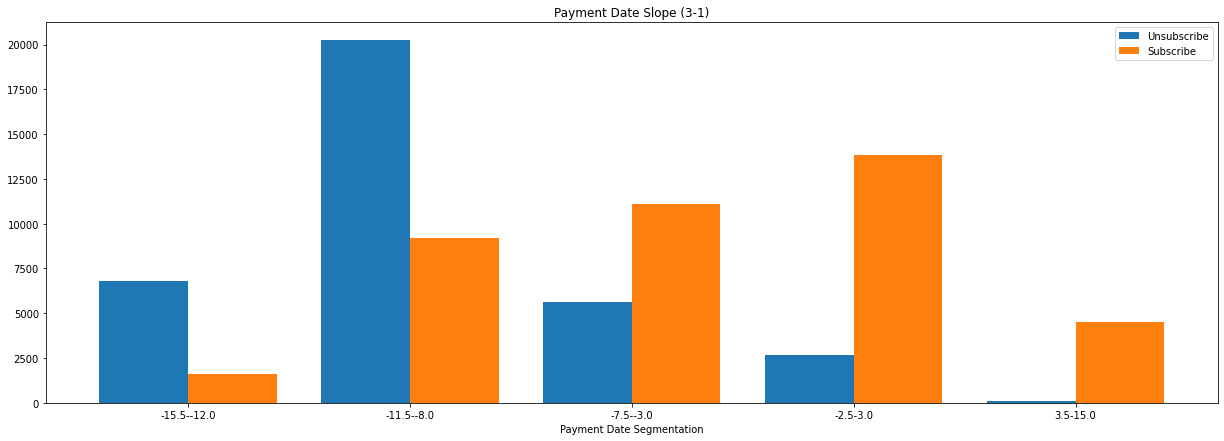

In [20]:
from sklearn.cluster import KMeans

X = df_temp[["billing_slope(3-1)_paymentDate"]].values
kmeans = KMeans(n_clusters = 5, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0]])
list_b = np.array([df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_slope(3-1)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]], 2), round(list_b[list_b.argsort()[0]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[1]], 2), round(list_b[list_b.argsort()[1]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[2]], 2), round(list_b[list_b.argsort()[2]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[3]], 2), round(list_b[list_b.argsort()[3]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[4]], 2), round(list_b[list_b.argsort()[4]], 2))]

valueA = [df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0]]

valueB = [df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0],
          df_temp[["billing_slope(3-1)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_paymentDate"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Payment Date Segmentation")
plt.title("Payment Date Slope (3-1)")
plt.legend()
plt.show()

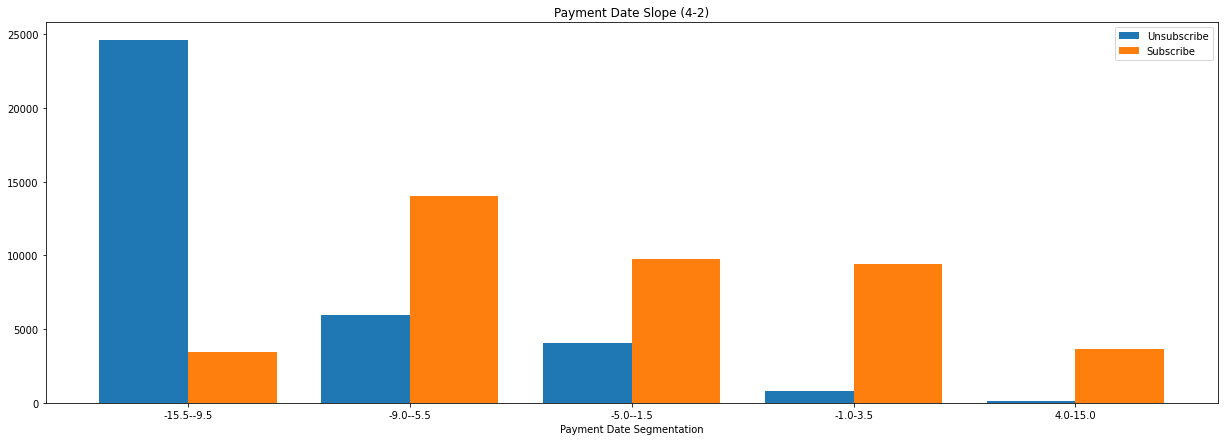

In [21]:
from sklearn.cluster import KMeans

X = df_temp[["billing_slope(4-2)_paymentDate"]].values
kmeans = KMeans(n_clusters = 5, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0]])
list_b = np.array([df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_slope(4-2)_paymentDate"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]], 2), round(list_b[list_b.argsort()[0]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[1]], 2), round(list_b[list_b.argsort()[1]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[2]], 2), round(list_b[list_b.argsort()[2]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[3]], 2), round(list_b[list_b.argsort()[3]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[4]], 2), round(list_b[list_b.argsort()[4]], 2))]

valueA = [df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0]]

valueB = [df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0],
          df_temp[["billing_slope(4-2)_paymentDate"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_paymentDate"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Payment Date Segmentation")
plt.title("Payment Date Slope (4-2)")
plt.legend()
plt.show()

#### Amount Total Mean

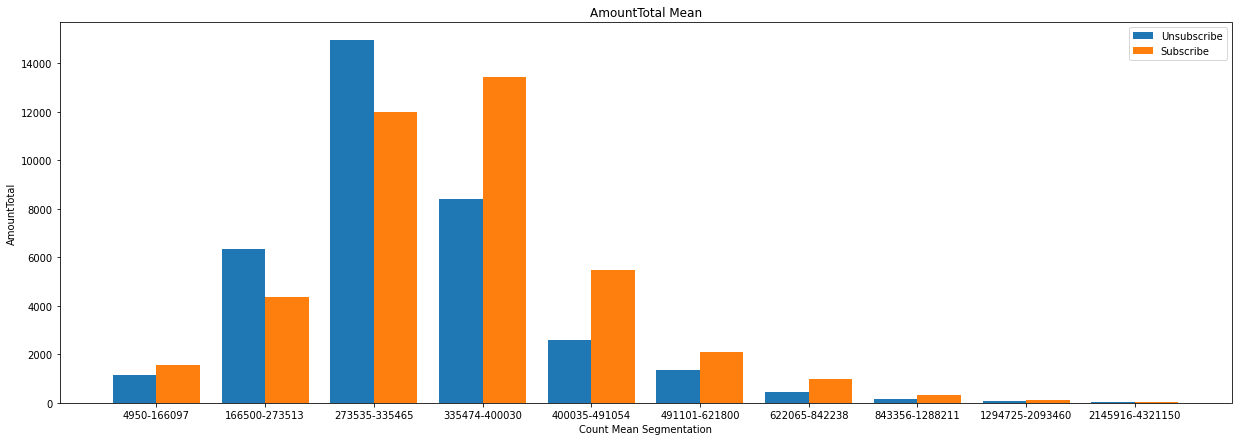

In [22]:
from sklearn.cluster import KMeans

X = df_temp[["billing_mean_amountTotal"]].values
kmeans = KMeans(n_clusters = 10, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].min()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].min()[0]])
list_b = np.array([df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].max()[0],
                   df_temp[["billing_mean_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]]), round(list_b[list_b.argsort()[0]])),
        "{}-{}".format(round(list_a[list_a.argsort()[1]]), round(list_b[list_b.argsort()[1]])),
        "{}-{}".format(round(list_a[list_a.argsort()[2]]), round(list_b[list_b.argsort()[2]])),
        "{}-{}".format(round(list_a[list_a.argsort()[3]]), round(list_b[list_b.argsort()[3]])),
        "{}-{}".format(round(list_a[list_a.argsort()[4]]), round(list_b[list_b.argsort()[4]])),
        "{}-{}".format(round(list_a[list_a.argsort()[5]]), round(list_b[list_b.argsort()[5]])),
        "{}-{}".format(round(list_a[list_a.argsort()[6]]), round(list_b[list_b.argsort()[6]])),
        "{}-{}".format(round(list_a[list_a.argsort()[7]]), round(list_b[list_b.argsort()[7]])),
        "{}-{}".format(round(list_a[list_a.argsort()[8]]), round(list_b[list_b.argsort()[8]])),
        "{}-{}".format(round(list_a[list_a.argsort()[9]]), round(list_b[list_b.argsort()[9]]))]

valueA = [df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[5]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[6]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[7]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[8]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[9]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0]]

valueB = [df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[5]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[6]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[7]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[8]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0],
          df_temp[["billing_mean_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[9]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_mean_amountTotal"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Count Mean Segmentation")
plt.ylabel("AmountTotal")
plt.title("AmountTotal Mean")
plt.legend()
plt.show()

#### Amount Total Std

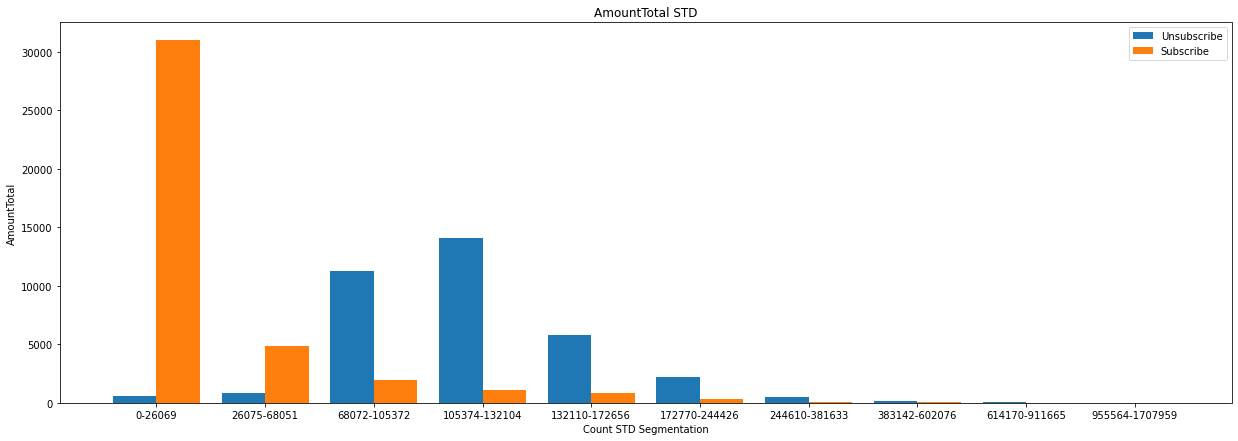

In [23]:
from sklearn.cluster import KMeans

X = df_temp[["billing_std_amountTotal"]].values
kmeans = KMeans(n_clusters = 10, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].min()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].min()[0]])
list_b = np.array([df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[5]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[6]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[7]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[8]].max()[0],
                   df_temp[["billing_std_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[9]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]]), round(list_b[list_b.argsort()[0]])),
        "{}-{}".format(round(list_a[list_a.argsort()[1]]), round(list_b[list_b.argsort()[1]])),
        "{}-{}".format(round(list_a[list_a.argsort()[2]]), round(list_b[list_b.argsort()[2]])),
        "{}-{}".format(round(list_a[list_a.argsort()[3]]), round(list_b[list_b.argsort()[3]])),
        "{}-{}".format(round(list_a[list_a.argsort()[4]]), round(list_b[list_b.argsort()[4]])),
        "{}-{}".format(round(list_a[list_a.argsort()[5]]), round(list_b[list_b.argsort()[5]])),
        "{}-{}".format(round(list_a[list_a.argsort()[6]]), round(list_b[list_b.argsort()[6]])),
        "{}-{}".format(round(list_a[list_a.argsort()[7]]), round(list_b[list_b.argsort()[7]])),
        "{}-{}".format(round(list_a[list_a.argsort()[8]]), round(list_b[list_b.argsort()[8]])),
        "{}-{}".format(round(list_a[list_a.argsort()[9]]), round(list_b[list_b.argsort()[9]]))]

valueA = [df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[5]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[6]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[7]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[8]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[9]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0]]

valueB = [df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[5]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[6]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[7]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[8]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0],
          df_temp[["billing_std_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[9]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_std_amountTotal"]).count()[0]]

fig = plt.figure(figsize = (21, 7))
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Count STD Segmentation")
plt.ylabel("AmountTotal")
plt.title("AmountTotal STD")
plt.legend()
plt.show()

#### Amount Total Slope

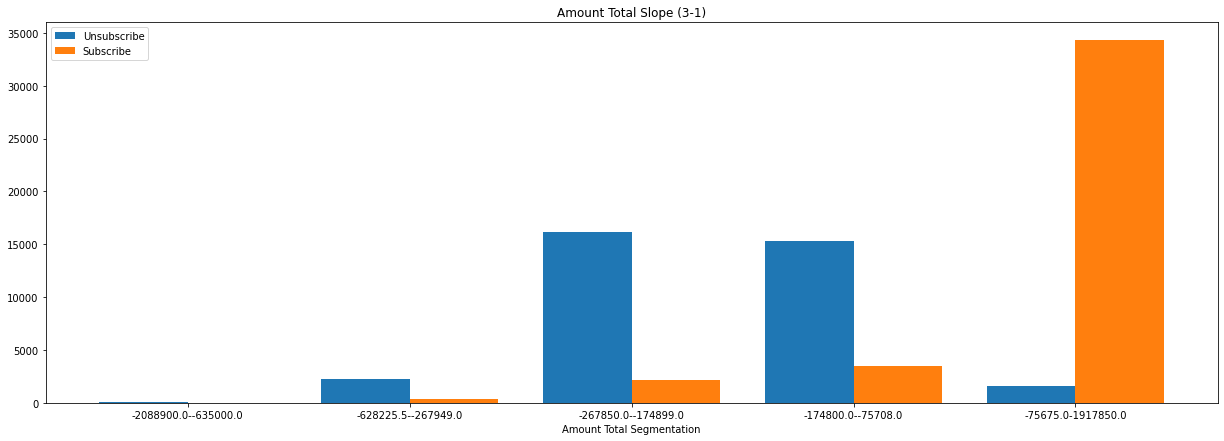

In [24]:
from sklearn.cluster import KMeans

X = df_temp[["billing_slope(3-1)_amountTotal"]].values
kmeans = KMeans(n_clusters = 5, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0]])
list_b = np.array([df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_slope(3-1)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]], 2), round(list_b[list_b.argsort()[0]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[1]], 2), round(list_b[list_b.argsort()[1]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[2]], 2), round(list_b[list_b.argsort()[2]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[3]], 2), round(list_b[list_b.argsort()[3]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[4]], 2), round(list_b[list_b.argsort()[4]], 2))]

valueA = [df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0]]

valueB = [df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0],
          df_temp[["billing_slope(3-1)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(3-1)_amountTotal"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Amount Total Segmentation")
plt.title("Amount Total Slope (3-1)")
plt.legend()
plt.show()

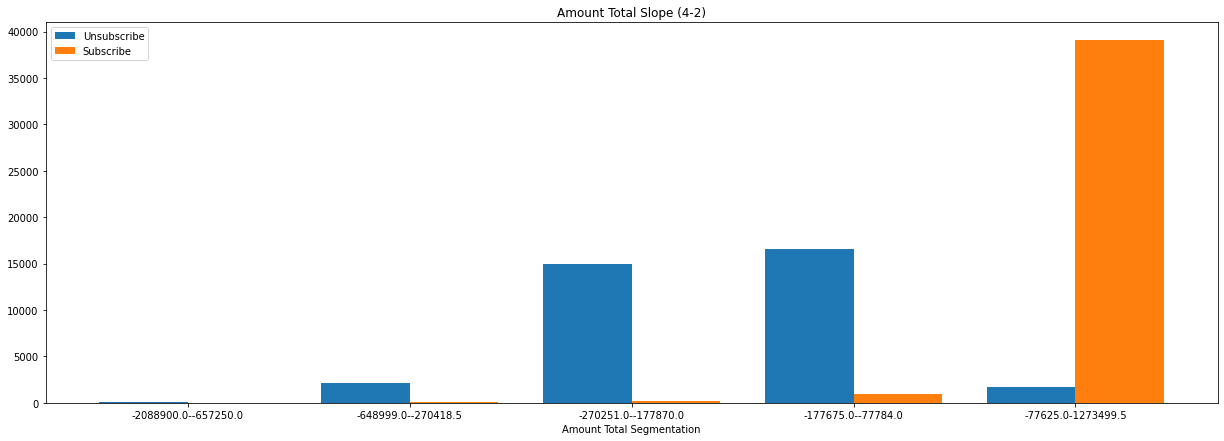

In [25]:
from sklearn.cluster import KMeans

X = df_temp[["billing_slope(4-2)_amountTotal"]].values
kmeans = KMeans(n_clusters = 5, random_state = 42).fit(X)
df_temp["cluster"] = kmeans.labels_

list_a = np.array([df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].min()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].min()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].min()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].min()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].min()[0]])
list_b = np.array([df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[0]].max()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[1]].max()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[2]].max()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[3]].max()[0],
                   df_temp[["billing_slope(4-2)_amountTotal"]].loc[df_temp["cluster"] == df_temp["cluster"].unique()[4]].max()[0]])


name = ["{}-{}".format(round(list_a[list_a.argsort()[0]], 2), round(list_b[list_b.argsort()[0]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[1]], 2), round(list_b[list_b.argsort()[1]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[2]], 2), round(list_b[list_b.argsort()[2]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[3]], 2), round(list_b[list_b.argsort()[3]], 2)),
        "{}-{}".format(round(list_a[list_a.argsort()[4]], 2), round(list_b[list_b.argsort()[4]], 2))]

valueA = [df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[0]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[1]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[2]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[3]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_a.argsort()[4]]) & (df_temp["subscribe_status"] == "UNSUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0]]

valueB = [df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[0]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[1]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[2]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[3]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0],
          df_temp[["billing_slope(4-2)_amountTotal"]].loc[(df_temp["cluster"] == df_temp["cluster"].unique()[list_b.argsort()[4]]) & (df_temp["subscribe_status"] == "SUBSCRIBE")].sort_values(by = ["billing_slope(4-2)_amountTotal"]).count()[0]]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(name))
plt.bar(X_axis - 0.2, valueA, 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, valueB, 0.4, label = "Subscribe")
  
plt.xticks(X_axis, name)
plt.xlabel("Amount Total Segmentation")
plt.title("Amount Total Slope (4-2)")
plt.legend()
plt.show()

#### Paket

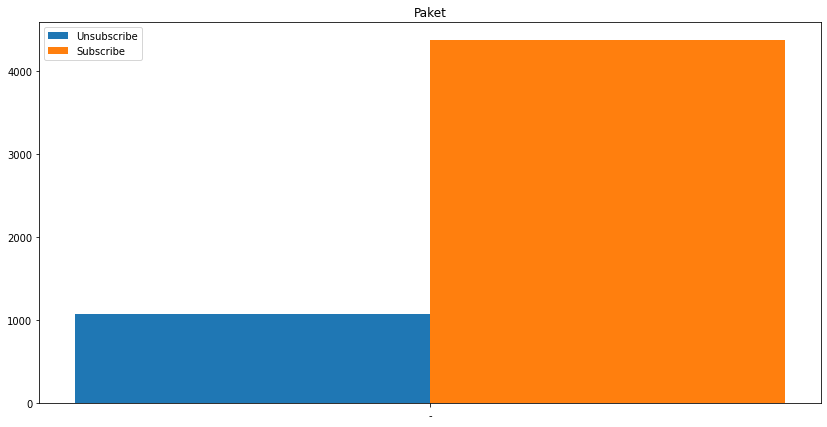

In [26]:
count_unsubs = []
count_subs = []
name = df_temp["gladius.paketradius"].unique()
for i in range(name.shape[0]):
    count_unsubs.append(df_temp[["gladius.paketradius"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["gladius.paketradius"] == name[i])].count()[0])
    count_subs.append(df_temp[["gladius.paketradius"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["gladius.paketradius"] == name[i])].count()[0])
count_unsubs = np.array(count_unsubs)
count_subs = np.array(count_subs)
count_unsubs_new = []
count_subs_new = []
name_new = []
for i in range(count_unsubs.shape[0]):
    if abs(count_unsubs[i] - count_subs[i]) >= (0.25 * max(count_unsubs[i], count_subs[i])):
        count_unsubs_new.append(count_unsubs[i])
        count_subs_new.append(count_subs[i])
        name_new.append(name[i])

list_data = {"count_unsubs" : count_unsubs_new,
             "count_subs" : count_subs_new,
             "name" : name_new}
df_bar = pd.DataFrame(list_data).sort_values(["count_subs", "count_unsubs"], ascending = [False, False])

fig = plt.figure(figsize = (14, 7))
#X_axis = np.arange(df_bar.count()[0])
X_axis = np.arange(1)
plt.bar(X_axis - 0.2, df_bar["count_unsubs"].values[0], 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, df_bar["count_subs"].values[0], 0.4, label = "Subscribe")
  
plt.xticks(X_axis, df_bar["name"].values[0])
plt.title("Paket")
plt.legend()
plt.show()

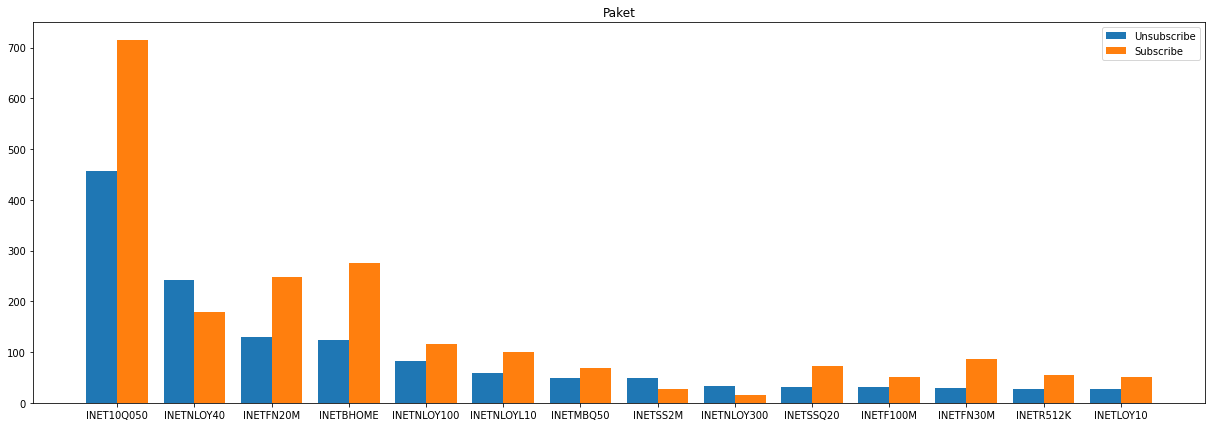

In [27]:
count_unsubs = np.array(count_unsubs)
count_subs = np.array(count_subs)
count_unsubs_new = []
count_subs_new = []
name_new = []
for i in range(count_unsubs.shape[0]):
    if abs(count_unsubs[i] - count_subs[i]) >= (0.25 * max(count_unsubs[i], count_subs[i])):
        count_unsubs_new.append(count_unsubs[i])
        count_subs_new.append(count_subs[i])
        name_new.append(name[i])

list_data = {"count_unsubs" : count_unsubs_new,
             "count_subs" : count_subs_new,
             "name" : name_new}
df_bar = pd.DataFrame(list_data).sort_values(["count_unsubs", "count_subs"], ascending = [False, False])

fig = plt.figure(figsize = (21, 7))
#X_axis = np.arange(df_bar.count()[0])
X_axis = np.arange(14)
plt.bar(X_axis - 0.2, df_bar["count_unsubs"].values[1:15], 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, df_bar["count_subs"].values[1:15], 0.4, label = "Subscribe")
  
plt.xticks(X_axis, df_bar["name"].values[1:15])
plt.title("Paket")
plt.legend()
plt.show()

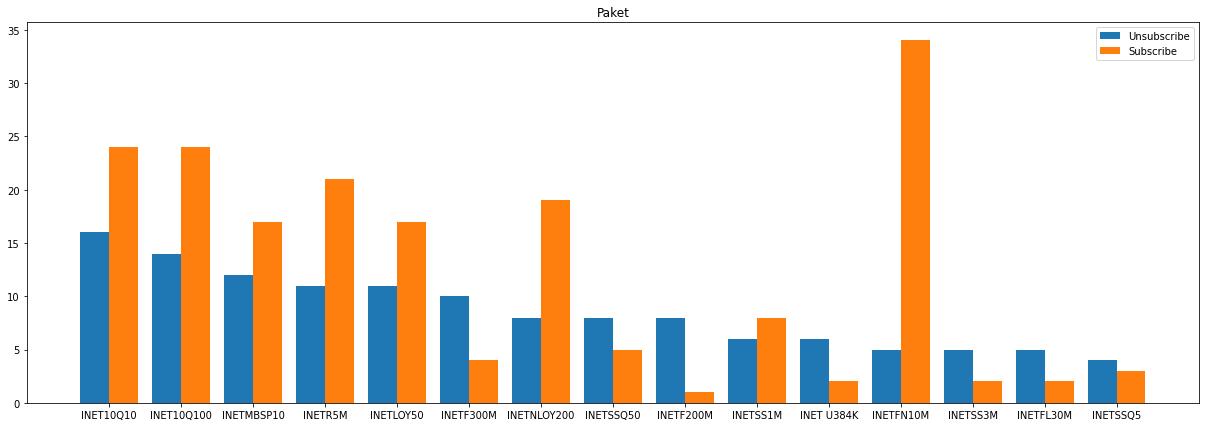

In [28]:
fig = plt.figure(figsize = (21, 7))
#X_axis = np.arange(df_bar.count()[0])
X_axis = np.arange(15)
plt.bar(X_axis - 0.2, df_bar["count_unsubs"].values[15:30], 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, df_bar["count_subs"].values[15:30], 0.4, label = "Subscribe")
  
plt.xticks(X_axis, df_bar["name"].values[15:30])
plt.title("Paket")
plt.legend()
plt.show()

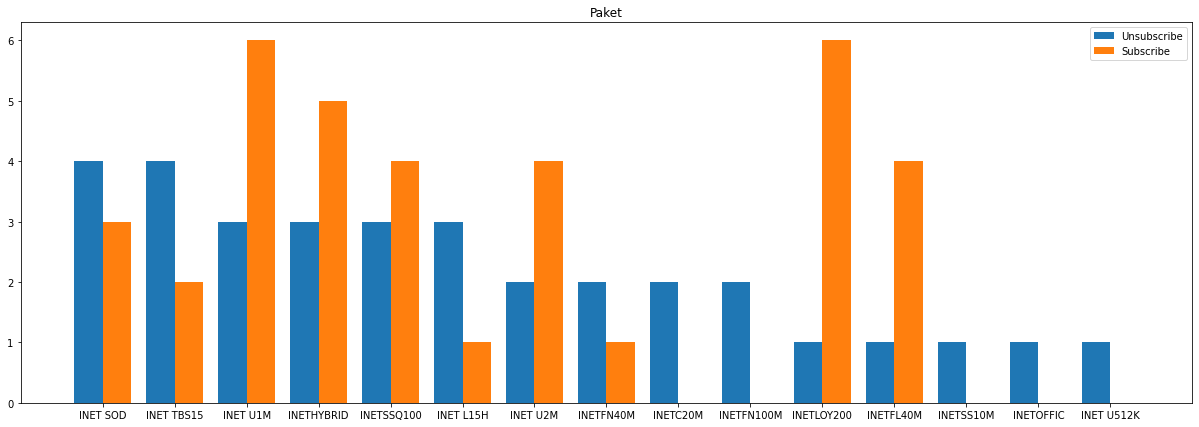

In [29]:
fig = plt.figure(figsize = (21, 7))
#X_axis = np.arange(df_bar.count()[0])
X_axis = np.arange(15)
plt.bar(X_axis - 0.2, df_bar["count_unsubs"].values[30:45], 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, df_bar["count_subs"].values[30:45], 0.4, label = "Subscribe")
  
plt.xticks(X_axis, df_bar["name"].values[30:45])
plt.title("Paket")
plt.legend()
plt.show()

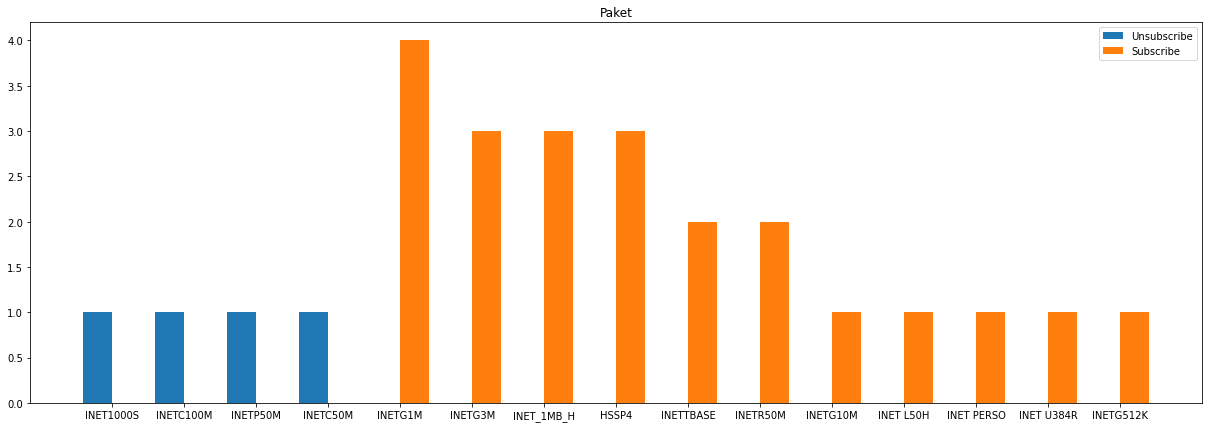

In [30]:
fig = plt.figure(figsize = (21, 7))
#X_axis = np.arange(df_bar.count()[0])
X_axis = np.arange(15)
plt.bar(X_axis - 0.2, df_bar["count_unsubs"].values[45:60], 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, df_bar["count_subs"].values[45:60], 0.4, label = "Subscribe")
  
plt.xticks(X_axis, df_bar["name"].values[45:60])
plt.title("Paket")
plt.legend()
plt.show()

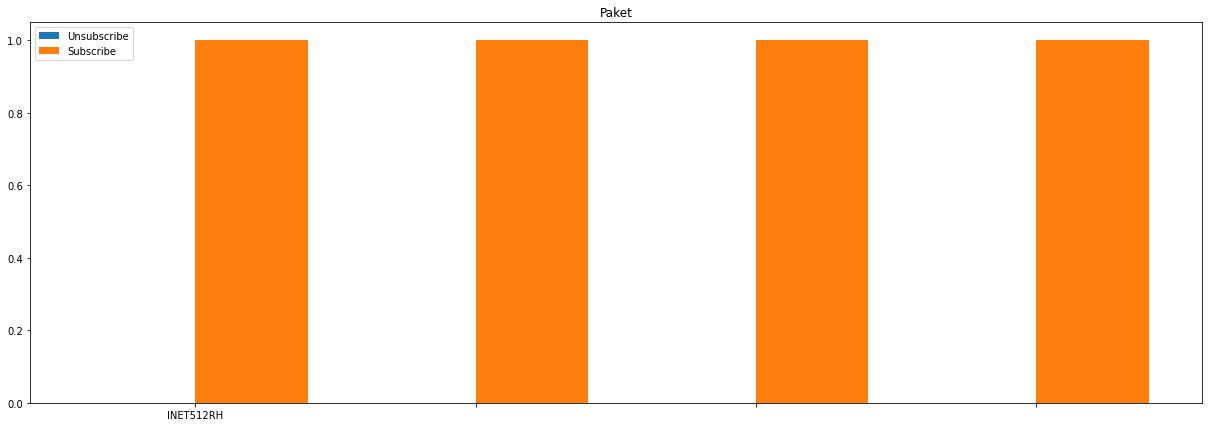

In [31]:
fig = plt.figure(figsize = (21, 7))
#X_axis = np.arange(df_bar.count()[0])
X_axis = np.arange(4)
plt.bar(X_axis - 0.2, df_bar["count_unsubs"].values[60:], 0.4, label = "Unsubscribe")
plt.bar(X_axis + 0.2, df_bar["count_subs"].values[60:], 0.4, label = "Subscribe")
  
plt.xticks(X_axis, df_bar["name"].values[60:])
plt.title("Paket")
plt.legend()
plt.show()

# Modelling

## Predict Next Month Still Subcsribe or Not (billing 11-2)

In [ ]:
df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")
df_temp.head()

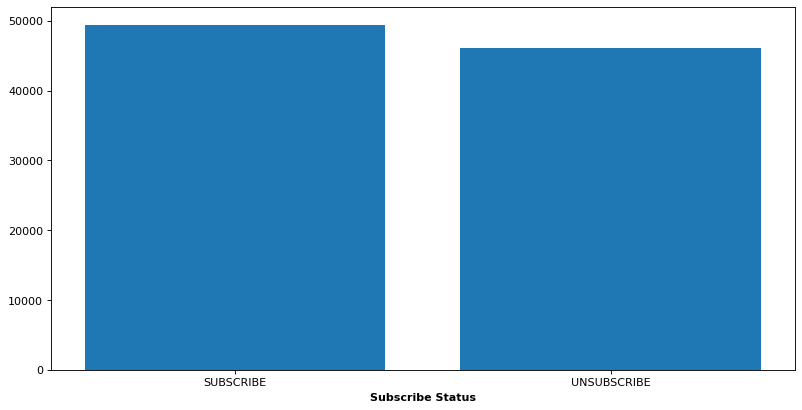

In [ ]:
witel_count = [df_temp.loc[df_temp["subscribe_status"] == df_temp["subscribe_status"].unique()[i]].count()[0] for i in range(len(df_temp["subscribe_status"].unique()))]
witel_name = df_temp["subscribe_status"].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Subscribe Status", fontweight = "bold")
plt.show()

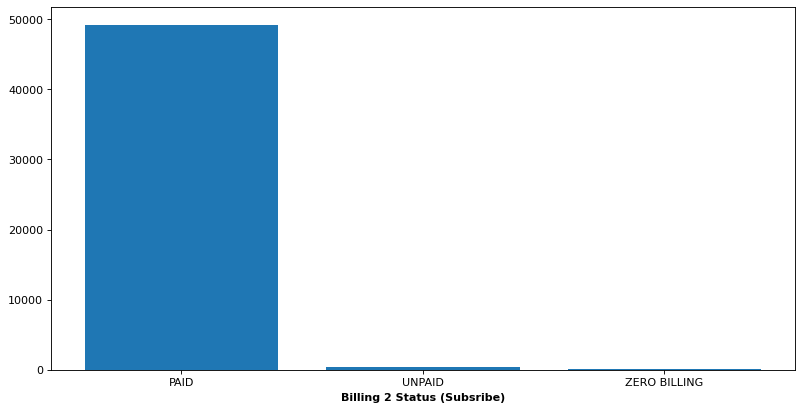

In [ ]:
witel_count = [df.loc[((df["billing_1_status"] != "CT0") & (df["billing_1_status"] != "ZERO BILLING")) & (df["billing_2_status"] == df["billing_2_status"].unique()[i])].count()[0] for i in range(len(df["billing_2_status"].unique()))]
witel_name = df["billing_2_status"].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Billing 2 Status (Subsribe)", fontweight = "bold")
plt.show()

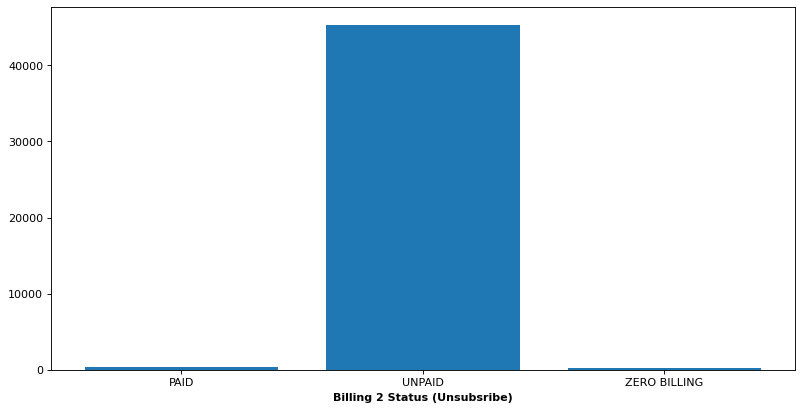

In [ ]:
witel_count = [df.loc[((df["billing_1_status"] == "CT0") | (df["billing_1_status"] == "ZERO BILLING")) & (df["billing_2_status"] == df["billing_2_status"].unique()[i])].count()[0] for i in range(len(df["billing_2_status"].unique()))]
witel_name = df["billing_2_status"].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Billing 2 Status (Unsubsribe)", fontweight = "bold")
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")
for month in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df_temp[["billing_{}_status".format(month)]] = df_temp["billing_{}_status".format(month)].apply(lambda x: 0 if x == "ZERO BILLING" else (1 if x == "UNPAID" else 2))
dat1 = df_temp[["billing_11_amountTotal",
                "billing_10_amountTotal",
                "billing_9_amountTotal",
                "billing_8_amountTotal",
                "billing_7_amountTotal",
                "billing_6_amountTotal",
                "billing_5_amountTotal",
                "billing_4_amountTotal",
                "billing_3_amountTotal",
                "billing_2_amountTotal"]].values
dat2 = df_temp[["billing_11_status",
                "billing_10_status",
                "billing_9_status",
                "billing_8_status",
                "billing_7_status",
                "billing_6_status",
                "billing_5_status",
                "billing_4_status",
                "billing_3_status",
                "billing_2_status"]].values
dat3 = df_temp[["billing_11_paymentDate",
                "billing_10_paymentDate",
                "billing_9_paymentDate",
                "billing_8_paymentDate",
                "billing_7_paymentDate",
                "billing_6_paymentDate",
                "billing_5_paymentDate",
                "billing_4_paymentDate",
                "billing_3_paymentDate",
                "billing_2_paymentDate"]].values

y = df_temp["subscribe_status"].apply(lambda x: 0 if x == "UNSUBSCRIBE" else 1).values

data = []
for i in range(dat1.shape[0]):
    b = []
    for j in range(dat1.shape[1]):
        c = []
        c.append(dat1[i][j])
        c.append(dat2[i][j])
        c.append(dat3[i][j])
        c.append(y[i])
        b.append(c)
    data.append(b)
data = np.array(data)

print(data)
print(y)

[[[3.44000e+05 2.00000e+00 1.70000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.50000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.60000e+01 1.00000e+00]
  ...
  [3.41000e+05 2.00000e+00 1.30000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.90000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.80000e+01 1.00000e+00]]

 [[3.27500e+05 2.00000e+00 1.70000e+01 0.00000e+00]
  [3.24500e+05 2.00000e+00 1.70000e+01 0.00000e+00]
  [3.24500e+05 2.00000e+00 1.80000e+01 0.00000e+00]
  ...
  [3.24500e+05 2.00000e+00 1.90000e+01 0.00000e+00]
  [3.24500e+05 2.00000e+00 2.10000e+01 0.00000e+00]
  [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]]

 [[1.45145e+05 2.00000e+00 8.00000e+00 0.00000e+00]
  [1.46355e+05 2.00000e+00 5.00000e+00 0.00000e+00]
  [1.43385e+05 2.00000e+00 5.00000e+00 0.00000e+00]
  ...
  [1.43385e+05 2.00000e+00 5.00000e+00 0.00000e+00]
  [1.43385e+05 2.00000e+00 5.00000e+00 0.00000e+00]
  [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]]

 ...

 [[0.00000e+00 0.00000e+00 0.00000

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, temp = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), np.reshape(df_temp[["billing_2_status"]].values, df_temp[["billing_2_status"]].values.shape[0]))
data = np.reshape(data, (data.shape[0], 10, 4))
y = data[:, :, 3][:, 0].astype(int)
data = data[:, :, 0:3]

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
'''
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, temp = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))
y, temp = ros.fit_resample(np.reshape(y, (y.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))
data = np.reshape(data, (data.shape[0], 10, 3))
y = np.reshape(y, y.shape[0])
'''

'\nfrom imblearn.over_sampling import RandomOverSampler\n\nros = RandomOverSampler(random_state = 42)\ndata, temp = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))\ny, temp = ros.fit_resample(np.reshape(y, (y.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))\ndata = np.reshape(data, (data.shape[0], 10, 3))\ny = np.reshape(y, y.shape[0])\n'

In [ ]:
from sklearn.model_selection import train_test_split

training_set, test_set, training_label, test_label = train_test_split(data, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 42,
                                                                      stratify = y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set[:, :, 0] = sc.fit_transform(training_set[:, :, 0])
test_set[:, :, 0] = sc.transform(test_set[:, :, 0])

X_train, X_test = training_set, test_set
y_train, y_test = training_label, test_label
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 8, dropout = 0.2, return_sequences = True, input_shape = (X_train.shape[1], 3)),                         
    tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),                         
    tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),
    tf.keras.layers.LSTM(units = 8, dropout = 0.2),
    #tf.keras.layers.Flatten(),  
    #tf.keras.layers.Dense(128, activation = "relu"),                     
    tf.keras.layers.Dense(1, activation = "sigmoid")],
    name = "LSTM_Predict_Subscribe")

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "LSTM_Predict_Subscribe"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 8)             384       
                                                                 
 lstm_1 (LSTM)               (None, 10, 8)             544       
                                                                 
 lstm_2 (LSTM)               (None, 10, 8)             544       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2,025
Trainable params: 2,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
#X_train[:, :, 0:2]

inputs = tf.keras.layers.Input(shape = (X_train.shape[1], 3))
x = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(inputs)
x = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x)
x = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x)
x = tf.keras.layers.LSTM(units = 8, dropout = 0.2)(x)

#x = tf.keras.layers.Dense(128, activation = "relu")(inputs)
#x = tf.keras.layers.Dense(32, activation = "relu")(x)
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model = tf.keras.Model(inputs, x)

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.summary()
'''

'\n#X_train[:, :, 0:2]\n\ninputs = tf.keras.layers.Input(shape = (X_train.shape[1], 3))\nx = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(inputs)\nx = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x)\nx = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x)\nx = tf.keras.layers.LSTM(units = 8, dropout = 0.2)(x)\n\n#x = tf.keras.layers.Dense(128, activation = "relu")(inputs)\n#x = tf.keras.layers.Dense(32, activation = "relu")(x)\nx = tf.keras.layers.Dense(1, activation = "sigmoid")(x)\nmodel = tf.keras.Model(inputs, x)\n\nmodel.compile(optimizer = "adam",\n              loss = "binary_crossentropy",\n              metrics = ["accuracy"])\n\nmodel.summary()\n'

In [ ]:
result = model.fit(X_train, y_train,
                   validation_data = (X_test, y_test), 
                   epochs = 20, 
                   batch_size = 32)

Epoch 1/20
3721/3721 [==============================] - 87s 21ms/step - loss: 0.3801 - accuracy: 0.8170 - val_loss: 0.1785 - val_accuracy: 0.9352
Epoch 2/20
3721/3721 [==============================] - 78s 21ms/step - loss: 0.2297 - accuracy: 0.9175 - val_loss: 0.1457 - val_accuracy: 0.9505
Epoch 3/20
3721/3721 [==============================] - 79s 21ms/step - loss: 0.2112 - accuracy: 0.9226 - val_loss: 0.1309 - val_accuracy: 0.9566
Epoch 4/20
3721/3721 [==============================] - 79s 21ms/step - loss: 0.1987 - accuracy: 0.9250 - val_loss: 0.1302 - val_accuracy: 0.9535
Epoch 5/20
3721/3721 [==============================] - 78s 21ms/step - loss: 0.1934 - accuracy: 0.9268 - val_loss: 0.1292 - val_accuracy: 0.9521
Epoch 6/20
3721/3721 [==============================] - 78s 21ms/step - loss: 0.1896 - accuracy: 0.9279 - val_loss: 0.1264 - val_accuracy: 0.9516
Epoch 7/20
3721/3721 [==============================] - 78s 21ms/step - loss: 0.1879 - accuracy: 0.9286 - val_loss: 0.1205 -

In [ ]:
print(model.evaluate(X_test, y_test))

931/931 [==============================] - 5s 5ms/step - loss: 0.1132 - accuracy: 0.9632
[0.11316196620464325, 0.9632454514503479]


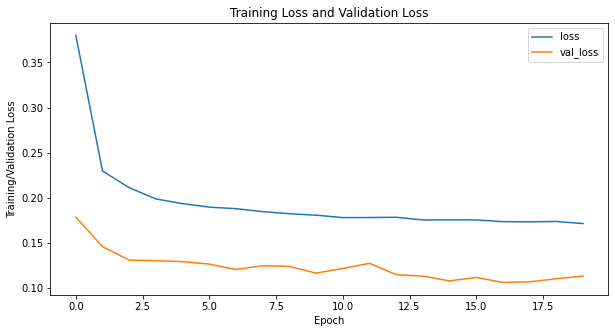

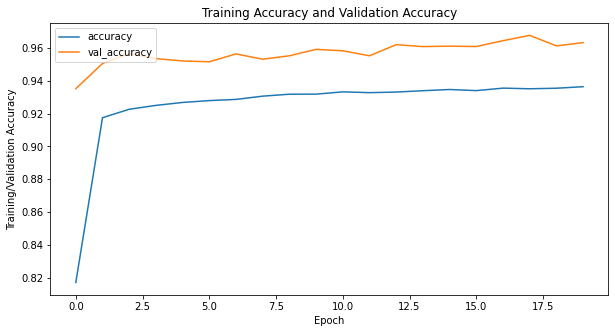

In [ ]:
# Plotting train_loss vs val_loss
plt.figure(figsize = (10, 5))
plt.plot(result.history["loss"], label = "loss")
plt.plot(result.history["val_loss"], label = "val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Loss")
plt.legend()

# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize = (10, 5))
plt.plot(result.history["accuracy"], label = "accuracy")
plt.plot(result.history["val_accuracy"], label = "val_accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Accuracy")
plt.legend(loc = "upper left")

In [ ]:
i = 4
print(X_test[i])

print("Predict : {}".format(int(np.round(model.predict(np.reshape(X_test[i], (1, X_test[i].shape[0], 3))))))) # Predict
print("Actual : {}".format(y_test[i])) # Actual

[[ 0.51611246  2.         12.        ]
 [ 0.42420439  2.         11.        ]
 [ 0.35382128  2.         11.        ]
 [ 0.27007192  2.          8.        ]
 [ 0.2560531   2.         13.        ]
 [ 0.27055784  2.         15.        ]
 [ 0.80524171  2.         11.        ]
 [ 0.28591945  2.         15.        ]
 [ 0.43767667  2.         14.        ]
 [-0.63010257  0.         30.        ]]
Predict : 0
Actual : 0


In [ ]:
#Prediction:
target_names = ["UNSUBSCRIBE", "SUBSCRIBE"]

predict = np.reshape(np.round(model.predict(X_test)).astype(int), (X_test.shape[0]))
    
print("Confusion Matrix")
cm = confusion_matrix(y_test, predict)
print(cm)
    
# show the accuracy, sensitivity, and specificity  
total = sum(sum(cm))  
acc = (cm[0][0] + cm[1][1]) / total
print("acc: {:.4f}".format(acc))
sensitivity = cm[0][0] / (cm[0][0] + cm[0][1])
print("{} sensitivity: {:.4f}".format(target_names[0], sensitivity))
sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
print("{} sensitivity: {:.4f}".format(target_names[1], sensitivity))

print("Classification Report")
print(classification_report(y_test, predict, target_names = target_names))

Confusion Matrix
[[17653    67]
 [ 1027 11018]]
acc: 0.9632
UNSUBSCRIBE sensitivity: 0.9962
SUBSCRIBE sensitivity: 0.9147
Classification Report
              precision    recall  f1-score   support

 UNSUBSCRIBE       0.95      1.00      0.97     17720
   SUBSCRIBE       0.99      0.91      0.95     12045

    accuracy                           0.96     29765
   macro avg       0.97      0.96      0.96     29765
weighted avg       0.96      0.96      0.96     29765



## Predict Next Month Still Subcsribe or Not (billing 11-3)

In [ ]:
df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")

df_temp.head()

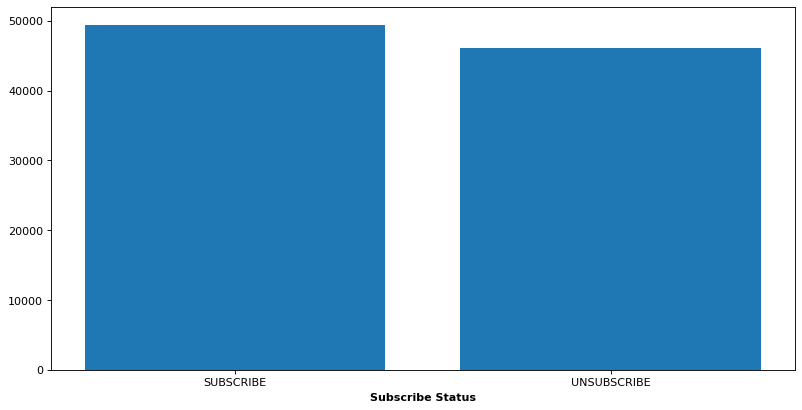

In [33]:
witel_count = [df_temp.loc[df_temp["subscribe_status"] == df_temp["subscribe_status"].unique()[i]].count()[0] for i in range(len(df_temp["subscribe_status"].unique()))]
witel_name = df_temp["subscribe_status"].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Subscribe Status", fontweight = "bold")
plt.show()

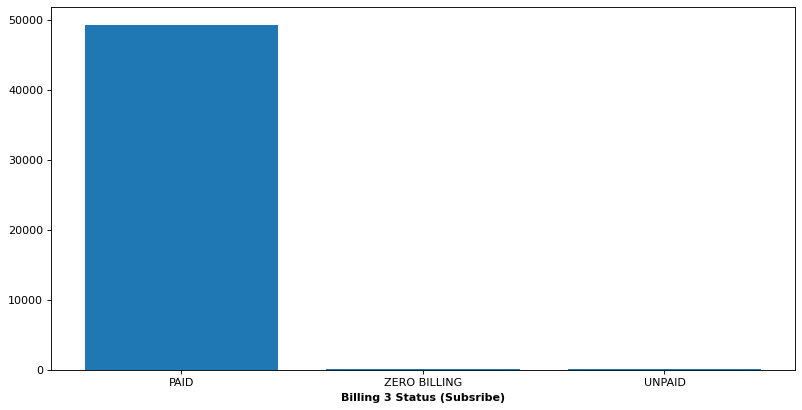

In [34]:
witel_count = [df.loc[((df["billing_1_status"] != "CT0") & (df["billing_1_status"] != "ZERO BILLING")) & (df["billing_3_status"] == df["billing_3_status"].unique()[i])].count()[0] for i in range(len(df["billing_3_status"].unique()))]
witel_name = df["billing_3_status"].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Billing 3 Status (Subsribe)", fontweight = "bold")
plt.show()

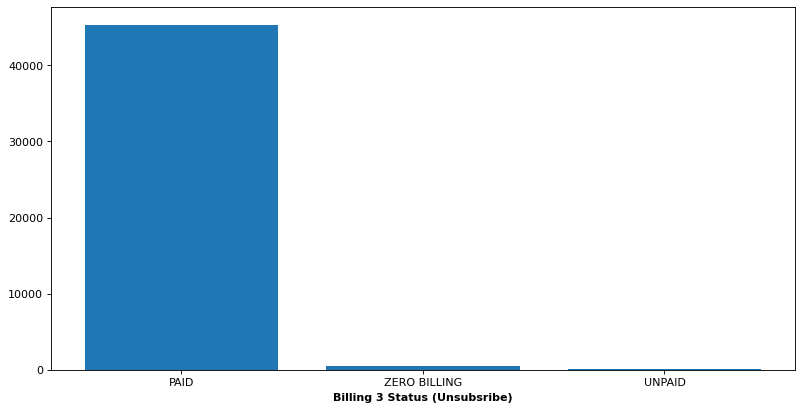

In [35]:
witel_count = [df.loc[((df["billing_1_status"] == "CT0") | (df["billing_1_status"] == "ZERO BILLING")) & (df["billing_3_status"] == df["billing_3_status"].unique()[i])].count()[0] for i in range(len(df["billing_3_status"].unique()))]
witel_name = df["billing_3_status"].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Billing 3 Status (Unsubsribe)", fontweight = "bold")
plt.show()

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")
for month in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df_temp[["billing_{}_status".format(month)]] = df_temp["billing_{}_status".format(month)].apply(lambda x: 0 if x == "ZERO BILLING" else (1 if x == "UNPAID" else 2))
dat1 = df_temp[["billing_11_amountTotal",
                "billing_10_amountTotal",
                "billing_9_amountTotal",
                "billing_8_amountTotal",
                "billing_7_amountTotal",
                "billing_6_amountTotal",
                "billing_5_amountTotal",
                "billing_4_amountTotal",
                "billing_3_amountTotal"]].values
dat2 = df_temp[["billing_11_status",
                "billing_10_status",
                "billing_9_status",
                "billing_8_status",
                "billing_7_status",
                "billing_6_status",
                "billing_5_status",
                "billing_4_status",
                "billing_3_status"]].values
dat3 = df_temp[["billing_11_paymentDate",
                "billing_10_paymentDate",
                "billing_9_paymentDate",
                "billing_8_paymentDate",
                "billing_7_paymentDate",
                "billing_6_paymentDate",
                "billing_5_paymentDate",
                "billing_4_paymentDate",
                "billing_3_paymentDate"]].values
                
y = df_temp["subscribe_status"].apply(lambda x: 0 if x == "UNSUBSCRIBE" else 1).values

data = []
for i in range(dat1.shape[0]):
    b = []
    for j in range(dat1.shape[1]):
        c = []
        c.append(dat1[i][j])
        c.append(dat2[i][j])
        c.append(dat3[i][j])
        c.append(y[i])
        b.append(c)
    data.append(b)
data = np.array(data)

print(data)
print(y)

[[[3.44000e+05 2.00000e+00 1.70000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.50000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.60000e+01 1.00000e+00]
  ...
  [3.41000e+05 2.00000e+00 1.80000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.30000e+01 1.00000e+00]
  [3.41000e+05 2.00000e+00 1.90000e+01 1.00000e+00]]

 [[3.27500e+05 2.00000e+00 1.70000e+01 0.00000e+00]
  [3.24500e+05 2.00000e+00 1.70000e+01 0.00000e+00]
  [3.24500e+05 2.00000e+00 1.80000e+01 0.00000e+00]
  ...
  [3.39250e+05 2.00000e+00 2.10000e+01 0.00000e+00]
  [3.24500e+05 2.00000e+00 1.90000e+01 0.00000e+00]
  [3.24500e+05 2.00000e+00 2.10000e+01 0.00000e+00]]

 [[1.45145e+05 2.00000e+00 8.00000e+00 0.00000e+00]
  [1.46355e+05 2.00000e+00 5.00000e+00 0.00000e+00]
  [1.43385e+05 2.00000e+00 5.00000e+00 0.00000e+00]
  ...
  [1.43385e+05 2.00000e+00 8.00000e+00 0.00000e+00]
  [1.43385e+05 2.00000e+00 5.00000e+00 0.00000e+00]
  [1.43385e+05 2.00000e+00 5.00000e+00 0.00000e+00]]

 ...

 [[0.00000e+00 0.00000e+00 0.00000

In [37]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, temp = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))
data = np.reshape(data, (data.shape[0], 9, 4))
y = data[:, :, 3][:, 0].astype(int)
data = data[:, :, 0:3]

In [38]:
'''
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, temp = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))
y, temp = ros.fit_resample(np.reshape(y, (y.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))
data = np.reshape(data, (data.shape[0], 9, 3))
y = np.reshape(y, y.shape[0])
'''

'\nfrom imblearn.over_sampling import RandomOverSampler\n\nros = RandomOverSampler(random_state = 42)\ndata, temp = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))\ny, temp = ros.fit_resample(np.reshape(y, (y.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))\ndata = np.reshape(data, (data.shape[0], 9, 3))\ny = np.reshape(y, y.shape[0])\n'

In [39]:
from sklearn.model_selection import train_test_split

training_set, test_set, training_label, test_label = train_test_split(data, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 42,
                                                                      stratify = y)

#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#training_set[:, :, 0] = sc.fit_transform(training_set[:, :, 0])
#test_set[:, :, 0] = sc.transform(test_set[:, :, 0])

X_train, X_test = training_set, test_set
y_train, y_test = training_label, test_label
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))

In [45]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 8, dropout = 0.2, return_sequences = True, input_shape = (X_train.shape[1], 3)),                         
    tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),                         
    tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),
    tf.keras.layers.LSTM(units = 8, dropout = 0.2),
    #tf.keras.layers.Flatten(),  
    #tf.keras.layers.Dense(128, activation = "relu"),                     
    tf.keras.layers.Dense(1, activation = "sigmoid")],
    name = "LSTM_Predict_Subscribe")

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "LSTM_Predict_Subscribe"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 9, 8)              384       
                                                                 
 lstm_5 (LSTM)               (None, 9, 8)              544       
                                                                 
 lstm_6 (LSTM)               (None, 9, 8)              544       
                                                                 
 lstm_7 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,025
Trainable params: 2,025
Non-trainable params: 0
_________________________________________________________________


In [46]:
result = model.fit(X_train, y_train,
                   validation_data = (X_test, y_test), 
                   epochs = 50, 
                   batch_size = 32)

Epoch 1/50
7100/7100 [==============================] - 169s 23ms/step - loss: 0.5223 - accuracy: 0.7268 - val_loss: 0.4862 - val_accuracy: 0.7239
Epoch 2/50
4800/7100 [===================>..........] - ETA: 48s - loss: 0.5002 - accuracy: 0.7294

KeyboardInterrupt: ignored

In [ ]:
print(model.evaluate(X_test, y_test))

In [ ]:
# Plotting train_loss vs val_loss
plt.figure(figsize = (10, 5))
plt.plot(result.history["loss"], label = "loss")
plt.plot(result.history["val_loss"], label = "val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Loss")
plt.legend()

# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize = (10, 5))
plt.plot(result.history["accuracy"], label = "accuracy")
plt.plot(result.history["val_accuracy"], label = "val_accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Accuracy")
plt.legend(loc = "upper left")

In [ ]:
i = 4
print(X_test[i])

print("Predict : {}".format(int(np.round(model.predict(np.reshape(X_test[i], (1, X_test[i].shape[0], 3))))))) # Predict
print("Actual : {}".format(y_test[i])) # Actual

In [ ]:
#Prediction:
target_names = ["UNSUBSCRIBE", "SUBSCRIBE"]

predict = np.reshape(np.round(model.predict(X_test)).astype(int), (X_test.shape[0]))
    
print("Confusion Matrix")
cm = confusion_matrix(y_test, predict)
print(cm)
    
# show the accuracy, sensitivity, and specificity  
total = sum(sum(cm))  
acc = (cm[0][0] + cm[1][1]) / total
print("acc: {:.4f}".format(acc))
sensitivity = cm[0][0] / (cm[0][0] + cm[0][1])
print("{} sensitivity: {:.4f}".format(target_names[0], sensitivity))
sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
print("{} sensitivity: {:.4f}".format(target_names[1], sensitivity))

print("Classification Report")
print(classification_report(y_test, predict, target_names = target_names))

#### Multiple Input

In [68]:
'''
# billing status
0 : ZERO BILLING
1 : UNPAID
2 : PAID

# paket radius
0 -
1 HSSP4
2 INET L15H
3 INET L50H
4 INET PERSO
5 INET SOD
6 INET TBS15
7 INET U1M
8 INET U2M
9 INET U384K
10 INET U384R
11 INET U3M
12 INET U512K
13 INET U512R
14 INET1000H
15 INET1000S
16 INET10M
17 INET10Q050
18 INET10Q10
19 INET10Q100
20 INET10Q20
21 INET10Q50
22 INET512RH
23 INETBHOME
24 INETC100M
25 INETC10M
26 INETC20M
27 INETC50M
28 INETF100M
29 INETF10M
30 INETF10ML
31 INETF200M
32 INETF20M
33 INETF300M
34 INETF30M
35 INETF40M
36 INETF50M
37 INETFL10M
38 INETFL20M
39 INETFL30M
40 INETFL40M
41 INETFN100M
42 INETFN10M
43 INETFN20M
44 INETFN30M
45 INETFN40M
46 INETFN50M
47 INETG10M
48 INETG1M
49 INETG3M
50 INETG512K
51 INETHYBRID
52 INETLOY10
53 INETLOY100
54 INETLOY20
55 INETLOY200
56 INETLOY30
57 INETLOY300
58 INETLOY40
59 INETLOY50
60 INETMBQ50
61 INETMBSP10
62 INETNLOY10
63 INETNLOY100
64 INETNLOY20
65 INETNLOY200
66 INETNLOY30
67 INETNLOY300
68 INETNLOY40
69 INETNLOY50
70 INETNLOYL10
71 INETNLOYL20
72 INETOFFIC
73 INETP50M
74 INETR10M
75 INETR1M
76 INETR20M
77 INETR2M
78 INETR3M
79 INETR50M
80 INETR512K
81 INETR5M
82 INETSS10M
83 INETSS1M
84 INETSS2M
85 INETSS3M
86 INETSSQ100
87 INETSSQ20
88 INETSSQ5
89 INETSSQ50
90 INETTBASE
91 INET_1MB_H
92 INET_2MB_H
93 INET_3MB_H
'''

'\n# billing status\n0 : ZERO BILLING\n1 : UNPAID\n2 : PAID\n\n# paket radius\n0 -\n1 HSSP4\n2 INET L15H\n3 INET L50H\n4 INET PERSO\n5 INET SOD\n6 INET TBS15\n7 INET U1M\n8 INET U2M\n9 INET U384K\n10 INET U384R\n11 INET U3M\n12 INET U512K\n13 INET U512R\n14 INET1000H\n15 INET1000S\n16 INET10M\n17 INET10Q050\n18 INET10Q10\n19 INET10Q100\n20 INET10Q20\n21 INET10Q50\n22 INET512RH\n23 INETBHOME\n24 INETC100M\n25 INETC10M\n26 INETC20M\n27 INETC50M\n28 INETF100M\n29 INETF10M\n30 INETF10ML\n31 INETF200M\n32 INETF20M\n33 INETF300M\n34 INETF30M\n35 INETF40M\n36 INETF50M\n37 INETFL10M\n38 INETFL20M\n39 INETFL30M\n40 INETFL40M\n41 INETFN100M\n42 INETFN10M\n43 INETFN20M\n44 INETFN30M\n45 INETFN40M\n46 INETFN50M\n47 INETG10M\n48 INETG1M\n49 INETG3M\n50 INETG512K\n51 INETHYBRID\n52 INETLOY10\n53 INETLOY100\n54 INETLOY20\n55 INETLOY200\n56 INETLOY30\n57 INETLOY300\n58 INETLOY40\n59 INETLOY50\n60 INETMBQ50\n61 INETMBSP10\n62 INETNLOY10\n63 INETNLOY100\n64 INETNLOY20\n65 INETNLOY200\n66 INETNLOY30\n67 

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_temp = df.copy()
df_temp.loc[(df_temp["billing_1_status"] == "CT0") | (df_temp["billing_1_status"] == "ZERO BILLING") | ((df_temp["billing_2_status"] == "UNPAID") & (df_temp["billing_1_status"] == "UNPAID")), "subscribe_status"] = "UNSUBSCRIBE"
df_temp["subscribe_status"] = df_temp["subscribe_status"].fillna("SUBSCRIBE")
for month in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    df_temp[["billing_{}_status".format(month)]] = df_temp["billing_{}_status".format(month)].apply(lambda x: 0 if x == "ZERO BILLING" else (1 if x == "UNPAID" else 2))
dat1 = df_temp[["billing_11_amountTotal",
                "billing_10_amountTotal",
                "billing_9_amountTotal",
                "billing_8_amountTotal",
                "billing_7_amountTotal",
                "billing_6_amountTotal",
                "billing_5_amountTotal",
                "billing_4_amountTotal",
                "billing_3_amountTotal"]].values
dat2 = df_temp[["billing_11_status",
                "billing_10_status",
                "billing_9_status",
                "billing_8_status",
                "billing_7_status",
                "billing_6_status",
                "billing_5_status",
                "billing_4_status",
                "billing_3_status"]].values
dat3 = df_temp[["billing_11_paymentDate",
                "billing_10_paymentDate",
                "billing_9_paymentDate",
                "billing_8_paymentDate",
                "billing_7_paymentDate",
                "billing_6_paymentDate",
                "billing_5_paymentDate",
                "billing_4_paymentDate",
                "billing_3_paymentDate"]].values
encoder = OneHotEncoder(sparse = False)
dat4 = encoder.fit_transform(df_temp[["gladius.paketradius"]])

                
y = df_temp["subscribe_status"].apply(lambda x: 0 if x == "UNSUBSCRIBE" else 1).values

data = []
for i in range(dat1.shape[0]):
    b = []
    for j in range(dat1.shape[1]):
        c = []
        c.append(dat1[i][j])
        c.append(dat2[i][j])
        c.append(dat3[i][j])
        c.append(dat4[i])
        c.append(y[i])
        b.append(c)
    data.append(b)
data = np.array(data)

#print(data)
#print(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [99]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, temp = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), np.reshape(df_temp[["billing_3_status"]].values, df_temp[["billing_3_status"]].values.shape[0]))
data, temp = ros.fit_resample(data, np.reshape(data, (data.shape[0], 9, 5))[:, :, 4][:, 0].astype(int))
data = np.reshape(data, (data.shape[0], 9, 5))
y = data[:, :, 4][:, 0].astype(int)
data = data[:, :, 0:4]

In [102]:
from sklearn.model_selection import train_test_split

training_set, test_set, training_label, test_label = train_test_split(data, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 42,
                                                                      stratify = y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set[:, :, 0] = sc.fit_transform(training_set[:, :, 0])
test_set[:, :, 0] = sc.transform(test_set[:, :, 0])

X_train, X_test = training_set, test_set
y_train, y_test = training_label, test_label
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 4))

X_train2 = X_train[:, 0, 3]
X_test2 = X_test[:, 0, 3]
X_train = X_train[:, :, 0:3].astype(float)
X_test = X_test[:, :, 0:3].astype(float)

In [103]:
list_a = []
for i in range(X_train2.shape[0]):
    list_a.append(list(X_train2[i]))
X_train2 = np.array(list_a)

list_b = []
for i in range(X_test2.shape[0]):
    list_b.append(list(X_test2[i]))
X_test2 = np.array(list_b)

In [105]:
# define two sets of inputs
inputA = tf.keras.layers.Input(shape = (X_train.shape[1], 3))
inputB = tf.keras.layers.Input(shape = (94))

# the first branch operates on the first input
x = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(inputA)
x = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x)
x = tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2)(x)
x = tf.keras.layers.LSTM(units = 8, dropout = 0.2)(x)
#x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(8, activation = "relu")(x)
x = tf.keras.Model(inputs = inputA, outputs = x)

# the second branch opreates on the second input
y = tf.keras.layers.Dense(128, activation = "relu")(inputB)
y = tf.keras.layers.Dense(32, activation = "relu")(y)
y = tf.keras.layers.Dense(8, activation = "relu")(y)
y = tf.keras.Model(inputs = inputB, outputs = y)

# combine the output of the two branches
combined = tf.keras.layers.concatenate([x.output, y.output])

#x = tf.keras.layers.Dense(128, activation = "relu")(inputs)
z = tf.keras.layers.Dense(128, activation = "relu")(combined)
z = tf.keras.layers.Dense(32, activation = "relu")(z)
z = tf.keras.layers.Dense(1, activation = "sigmoid")(z)
#model = tf.keras.Model(inputs, x)
model = tf.keras.Model(inputs = [x.input, y.input], outputs = z)

model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 lstm_4 (LSTM)                  (None, 9, 8)         384         ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 94)]         0           []                               
                                                                                                  
 lstm_5 (LSTM)                  (None, 9, 8)         544         ['lstm_4[0][0]']                 
                                                                                            

In [ ]:
result = model.fit([X_train, X_train2], y_train,
                   validation_data = ([X_test, X_test2], y_test), 
                   epochs = 100, 
                   batch_size = 32)

Epoch 1/100
10280/10280 [==============================] - 232s 22ms/step - loss: 0.5261 - accuracy: 0.7336 - val_loss: 0.4469 - val_accuracy: 0.7751
Epoch 2/100
10280/10280 [==============================] - 219s 21ms/step - loss: 0.4612 - accuracy: 0.7717 - val_loss: 0.4195 - val_accuracy: 0.7971
Epoch 3/100
10280/10280 [==============================] - 215s 21ms/step - loss: 0.4430 - accuracy: 0.7812 - val_loss: 0.4122 - val_accuracy: 0.8037
Epoch 4/100
10280/10280 [==============================] - 215s 21ms/step - loss: 0.4307 - accuracy: 0.7882 - val_loss: 0.3961 - val_accuracy: 0.8106
Epoch 5/100
10280/10280 [==============================] - 218s 21ms/step - loss: 0.4189 - accuracy: 0.7953 - val_loss: 0.4036 - val_accuracy: 0.8062
Epoch 6/100
10280/10280 [==============================] - 218s 21ms/step - loss: 0.4088 - accuracy: 0.8021 - val_loss: 0.3767 - val_accuracy: 0.8178
Epoch 7/100
10280/10280 [==============================] - 217s 21ms/step - loss: 0.4027 - accuracy:

In [ ]:
# Plotting train_loss vs val_loss
plt.figure(figsize = (10, 5))
plt.plot(result.history["loss"], label = "loss")
plt.plot(result.history["val_loss"], label = "val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Loss")
plt.legend()

# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize = (10, 5))
plt.plot(result.history["accuracy"], label = "accuracy")
plt.plot(result.history["val_accuracy"], label = "val_accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Training/Validation Accuracy")
plt.legend(loc = "upper left")

In [48]:
#model.save("model_IHZ.h5")
model = tf.keras.models.load_model("model_IHZ.h5")

In [49]:
print(model.evaluate([X_test, X_test2], y_test))

1775/1775 [==============================] - 12s 5ms/step - loss: 0.3363 - accuracy: 0.8030
[0.33628544211387634, 0.802968442440033]


In [50]:
i = 0
print(X_test[i])
print(X_test2[i])

print("Predict : {}".format(model.predict([np.reshape(X_test[i], (1, X_test[i].shape[0], X_test[i].shape[1])), 
                                           np.reshape(X_test2[i], (1, X_test2[i].shape[0]))]))) # Predict
print("Actual : {}".format(y_test[i])) # Actual

[[ 0.78424772  2.         12.        ]
 [ 0.6924984   2.         19.        ]
 [ 0.24128189  2.         20.        ]
 [ 0.25599383  2.         22.        ]
 [ 0.63365671  2.         17.        ]
 [ 0.6009101   2.         17.        ]
 [ 0.08552314  2.          8.        ]
 [ 0.61461389  2.         13.        ]
 [ 1.36244609  2.         12.        ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predict : [[0.43908793]]
Actual : 0


In [51]:
#Prediction:
target_names = ["UNSUBSCRIBE", "SUBSCRIBE"]

predict = np.reshape(np.round(model.predict([X_test, X_test2])).astype(int), (X_test.shape[0]))
    
print("Confusion Matrix")
cm = confusion_matrix(y_test, predict)
print(cm)
    
# show the accuracy, sensitivity, and specificity  
total = sum(sum(cm))  
acc = (cm[0][0] + cm[1][1]) / total
print("acc: {:.4f}".format(acc))
sensitivity = cm[0][0] / (cm[0][0] + cm[0][1])
print("{} sensitivity: {:.4f}".format(target_names[0], sensitivity))
sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
print("{} sensitivity: {:.4f}".format(target_names[1], sensitivity))

print("Classification Report")
print(classification_report(y_test, predict, target_names = target_names))

Confusion Matrix
[[37791  3327]
 [ 7864  7816]]
acc: 0.8030
UNSUBSCRIBE sensitivity: 0.9191
SUBSCRIBE sensitivity: 0.4985
Classification Report
              precision    recall  f1-score   support

 UNSUBSCRIBE       0.83      0.92      0.87     41118
   SUBSCRIBE       0.70      0.50      0.58     15680

    accuracy                           0.80     56798
   macro avg       0.76      0.71      0.73     56798
weighted avg       0.79      0.80      0.79     56798



Churn 31090
Cenderung Churn 7279
Ragu-ragu 12669
Agak Loyal 2005
Loyal 3755


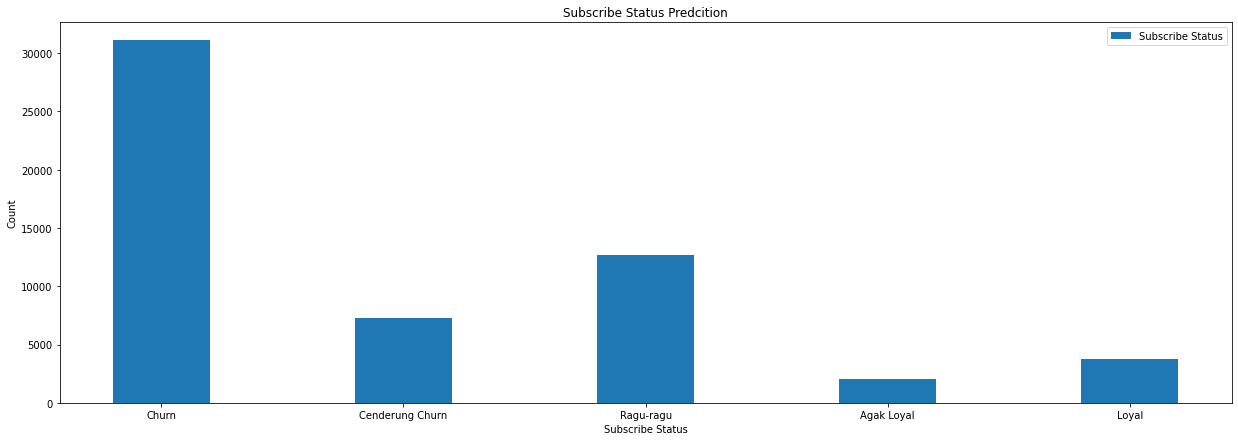

In [52]:
target_names = ["Churn", "Cenderung Churn", "Ragu-ragu", "Agak Loyal", "Loyal"]
churn = 0
cenderung_churn = 0
ragu_ragu = 0
agak_loyal = 0
loyal = 0
list_predict = model.predict([X_test, X_test2])
for i in list_predict:
    if i[0] < 0.25:
        churn += 1
    elif i[0] >= 0.25 and i[0] < 0.45:
        cenderung_churn += 1
    elif i[0] >= 0.45 and i[0] < 0.65:
        ragu_ragu += 1
    elif i[0] >= 0.65 and i[0] < 0.85:
        agak_loyal += 1
    else:
        loyal += 1
print(target_names[0], churn)
print(target_names[1], cenderung_churn)
print(target_names[2], ragu_ragu)
print(target_names[3], agak_loyal)
print(target_names[4], loyal)

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(target_names))
plt.bar(target_names, [churn, cenderung_churn, ragu_ragu, agak_loyal, loyal], width = 0.4, label = "Subscribe Status")
  
plt.xticks(X_axis, target_names)
plt.xlabel("Subscribe Status")
plt.ylabel("Count")
plt.title("Subscribe Status Predcition")
plt.legend()
plt.show()

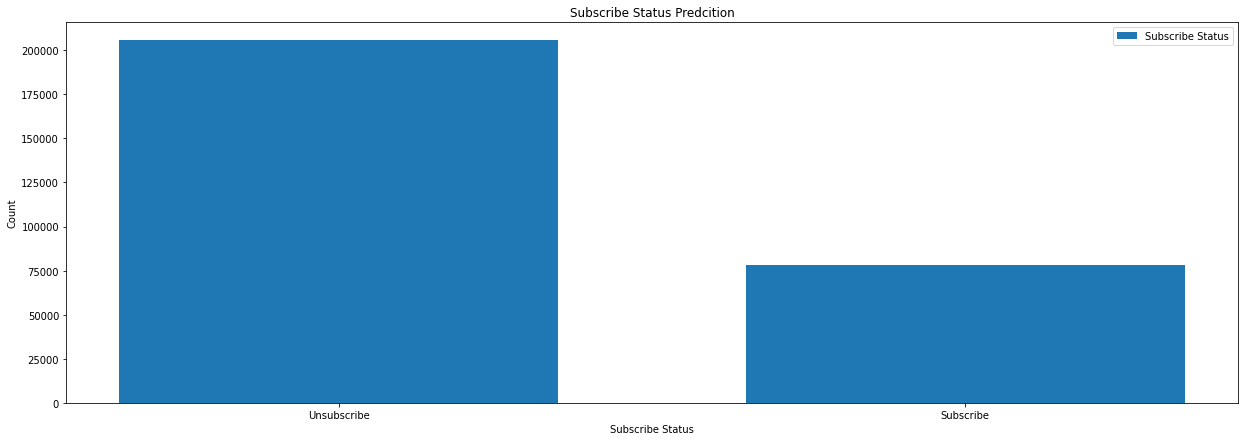

In [66]:
target_names = ["Unsubscribe", "Subscribe"]

fig = plt.figure(figsize = (21, 7))  
X_axis = np.arange(len(target_names))
plt.bar(target_names, [list(list(y_train) + list(y_test)).count(0), list(list(y_train) + list(y_test)).count(1)], width = 0.7, label = "Subscribe Status")
  
plt.xticks(X_axis, target_names)
plt.xlabel("Subscribe Status")
plt.ylabel("Count")
plt.title("Subscribe Status Predcition")
plt.legend()
plt.show()

In [57]:
'''
print("TP : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]))
print("FP : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]))

print("TN : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]))
print("FN : {} ".format(df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]))

TP = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]
FP = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] >= 7.6)].count()[0]
FN = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "UNSUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]
TN = df_temp[["billing_std_paymentDate"]].loc[(df_temp["subscribe_status"] == "SUBSCRIBE") & (df_temp["billing_std_paymentDate"] < 7.6)].count()[0]

print("Sensitivity : {} ".format((TN)/(TN+FP)))
print("Recall : {} ".format((TP)/(TP+FN)))
print("Precision : {} ".format((TP)/(TP+FP)))
print("Accuracy : {} ".format((TP+TN)/(TP+FP+TN+FN)))
'''

KeyError: ignored

## Predict Payment Date (Predict billing_3_paymentDate)

### 1 Feature (paymentDate)

In [ ]:
j = 3
witel_count = [df.loc[df["billing_{}_paymentDate".format(j)] == df["billing_{}_paymentDate".format(j)].unique()[i]].count()[0] for i in range(len(df["billing_{}_paymentDate".format(j)].unique()))]
witel_name = df["billing_{}_paymentDate".format(j)].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Payment Date 3", fontweight = "bold")
plt.show()

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

df_temp = df.copy()
df_temp = df_temp.sort_values(by = ["billing_3_paymentDate"], ascending = True)
data = df_temp[["billing_12_paymentDate",
                "billing_11_paymentDate",
                "billing_10_paymentDate",
                "billing_9_paymentDate",
                "billing_8_paymentDate",
                "billing_7_paymentDate",
                "billing_6_paymentDate",
                "billing_5_paymentDate",
                "billing_4_paymentDate"]].values
label = df_temp["billing_3_paymentDate"].values
encoder = LabelEncoder()
y = encoder.fit_transform(label)
y = np_utils.to_categorical(y)

print(data)
print(y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, y = ros.fit_resample(data, y)

In [ ]:
print(np.sort(df["billing_3_paymentDate"].unique()))

In [ ]:
from sklearn.model_selection import train_test_split

training_set, test_set, training_label, test_label = train_test_split(data, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 42, 
                                                                      stratify = y)

In [ ]:
X_train, X_test = training_set, test_set
y_train, y_test = training_label, test_label
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 8, dropout = 0.2, input_shape = (X_train.shape[1], 1)),                         
    #tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),                         
    #tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),
    #tf.keras.layers.LSTM(units = 8, dropout = 0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation = "relu"),                     
    tf.keras.layers.Dense(32, activation = "softmax")],
    name = "LSTM_Predict_Next_Payment")

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 50,
          batch_size = 32)

In [ ]:
i = 0
test = X_test[i]
print(test)
test = np.array(test)
test = np.reshape(test, (1, test.shape[0], 1))

print("Predict : {}".format(np.argmax(model.predict(test)))) # Predict
print("Actual : {}".format(np.argmax(y_test[i]))) # Actual

In [ ]:
df_temp["billing_3_paymentDate"].unique()

In [ ]:
from sklearn.metrics import confusion_matrix

dictionary = {}
true = []
pred = []
for i in range(test_set.shape[0]):
    test = X_test[i]
    test = np.array(test)
    test = np.reshape(test, (1, test.shape[0], 1))

    x = abs(np.argmax(model.predict(test)) - np.argmax(y_test[i]))
    true.append(np.argmax(y_test[i]))
    pred.append(np.argmax(model.predict(test)))

    if x in dictionary:
        dictionary[x] = dictionary[x] + 1
    else:
        dictionary[x] = 1
    clear_output(wait = True)
    print("Progress : {:.2%}".format(i/test_set.shape[0]))

dictionary = dict(sorted(dictionary.items()))

print("Confusion Matrix")
cm = confusion_matrix(true, pred)
cm = pd.DataFrame(cm)
cm

In [ ]:
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(range(len(dictionary)), list(dictionary.values()), align = "center")
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.xlabel("Payment Date 3 Diff Prediction", fontweight = "bold")
plt.show()

### 2 Feature (paymentDate, paymentstatus)

In [ ]:
j = 3
witel_count = [df.loc[df["billing_{}_paymentDate".format(j)] == df["billing_{}_paymentDate".format(j)].unique()[i]].count()[0] for i in range(len(df["billing_{}_paymentDate".format(j)].unique()))]
witel_name = df["billing_{}_paymentDate".format(j)].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Payment Date 3", fontweight = "bold")
plt.show()

In [ ]:
print(np.sort(df["billing_4_status"].unique()))

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

df_temp = df.copy()
df_temp = df_temp.sort_values(by = ["billing_3_paymentDate"], ascending = True)
for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    df_temp[["billing_{}_status".format(month)]] = df_temp["billing_{}_status".format(month)].apply(lambda x: 0 if x == "-" else (1 if x == "ZERO BILLING" else (2 if x == "UNPAID" else (3 if x == "PARTIAL" else 4))))
dat1 = df_temp[["billing_12_paymentDate",
                "billing_11_paymentDate",
                "billing_10_paymentDate",
                "billing_9_paymentDate",
                "billing_8_paymentDate",
                "billing_7_paymentDate",
                "billing_6_paymentDate",
                "billing_5_paymentDate",
                "billing_4_paymentDate"]].values
dat2 = df_temp[["billing_12_status",
                "billing_11_status",
                "billing_10_status",
                "billing_9_status",
                "billing_8_status",
                "billing_7_status",
                "billing_6_status",
                "billing_5_status",
                "billing_4_status"]].values
data = []
for i in range(dat1.shape[0]):
    b = []
    for j in range(dat1.shape[1]):
        c = []
        c.append(dat1[i][j])
        c.append(dat2[i][j])
        b.append(c)
    data.append(b)
data = np.array(data)
label = df_temp["billing_3_paymentDate"].values
encoder = LabelEncoder()
y = encoder.fit_transform(label)
y = np_utils.to_categorical(y)

print(data)
print(y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, y = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), y)

In [ ]:
print(np.sort(df["billing_3_paymentDate"].unique()))

In [ ]:
from sklearn.model_selection import train_test_split

training_set, test_set, training_label, test_label = train_test_split(data, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 42, 
                                                                      stratify = y)

In [ ]:
X_train, X_test = training_set, test_set
y_train, y_test = training_label, test_label
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 9, 2))
X_test = np.reshape(X_test, (X_test.shape[0], 9, 2))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 8, dropout = 0.2, input_shape = (X_train.shape[1], 2)),                         
    #tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),                         
    #tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),
    #tf.keras.layers.LSTM(units = 8, dropout = 0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation = "relu"),                     
    tf.keras.layers.Dense(32, activation = "softmax")],
    name = "LSTM_Predict_Next_Payment")

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 50,
          batch_size = 32)

In [ ]:
i = 0
test = X_test[i]
print(test)
test = np.array(test)
test = np.reshape(test, (1, 9, 2))

print("Predict : {}".format(np.argmax(model.predict(test)))) # Predict
print("Actual : {}".format(np.argmax(y_test[i]))) # Actual

In [ ]:
df_temp["billing_3_paymentDate"].unique()

In [ ]:
from sklearn.metrics import confusion_matrix

dictionary = {}
true = []
pred = []
for i in range(test_set.shape[0]):
    test = X_test[i]
    test = np.array(test)
    test = np.reshape(test, (1, 9, 2))

    x = abs(np.argmax(model.predict(test)) - np.argmax(y_test[i]))
    true.append(np.argmax(y_test[i]))
    pred.append(np.argmax(model.predict(test)))

    if x in dictionary:
        dictionary[x] = dictionary[x] + 1
    else:
        dictionary[x] = 1
    clear_output(wait = True)
    print("Progress : {:.2%}".format(i/test_set.shape[0]))

dictionary = dict(sorted(dictionary.items()))

print("Confusion Matrix")
cm = confusion_matrix(true, pred)
cm = pd.DataFrame(cm)
cm

In [ ]:
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(range(len(dictionary)), list(dictionary.values()), align = "center")
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.xlabel("Payment Date 3 Diff Prediction", fontweight = "bold")
plt.show()

### 3 Feature (paymentDate, amountTotal, paymentstatus)

In [ ]:
j = 3
witel_count = [df.loc[df["billing_{}_paymentDate".format(j)] == df["billing_{}_paymentDate".format(j)].unique()[i]].count()[0] for i in range(len(df["billing_{}_paymentDate".format(j)].unique()))]
witel_name = df["billing_{}_paymentDate".format(j)].unique()
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(witel_name, witel_count)
plt.xlabel("Payment Date 3", fontweight = "bold")
plt.show()

In [ ]:
print(np.sort(df["billing_4_status"].unique()))

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

df_temp = df.copy()
df_temp = df_temp.sort_values(by = ["billing_3_paymentDate"], ascending = True)
for month in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    df_temp[["billing_{}_status".format(month)]] = df_temp["billing_{}_status".format(month)].apply(lambda x: 0 if x == "-" else (1 if x == "ZERO BILLING" else (2 if x == "UNPAID" else (3 if x == "PARTIAL" else 4))))
dat1 = df_temp[["billing_12_paymentDate",
                "billing_11_paymentDate",
                "billing_10_paymentDate",
                "billing_9_paymentDate",
                "billing_8_paymentDate",
                "billing_7_paymentDate",
                "billing_6_paymentDate",
                "billing_5_paymentDate",
                "billing_4_paymentDate"]].values
dat2 = df_temp[["billing_12_amountTotal",
                "billing_11_amountTotal",
                "billing_10_amountTotal",
                "billing_9_amountTotal",
                "billing_8_amountTotal",
                "billing_7_amountTotal",
                "billing_6_amountTotal",
                "billing_5_amountTotal",
                "billing_4_amountTotal"]].values
dat3 = df_temp[["billing_12_status",
                "billing_11_status",
                "billing_10_status",
                "billing_9_status",
                "billing_8_status",
                "billing_7_status",
                "billing_6_status",
                "billing_5_status",
                "billing_4_status"]].values
data = []
for i in range(dat1.shape[0]):
    b = []
    for j in range(dat1.shape[1]):
        c = []
        c.append(dat1[i][j])
        c.append(dat2[i][j])
        c.append(dat3[i][j])
        b.append(c)
    data.append(b)
data = np.array(data)

label = df_temp["billing_3_paymentDate"].values
encoder = LabelEncoder()
y = encoder.fit_transform(label)
y = np_utils.to_categorical(y)

print(data)
print(y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
data, y = ros.fit_resample(np.reshape(data, (data.shape[0], -1)), y)

In [ ]:
print(np.sort(df["billing_3_paymentDate"].unique()))

In [ ]:
from sklearn.model_selection import train_test_split

training_set, test_set, training_label, test_label = train_test_split(data, y, 
                                                                      test_size = 0.2, 
                                                                      random_state = 42, 
                                                                      stratify = y)

In [ ]:
X_train, X_test = training_set, test_set
y_train, y_test = training_label, test_label
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 9, 3))
X_test = np.reshape(X_test, (X_test.shape[0], 9, 3))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 8, dropout = 0.2, input_shape = (X_train.shape[1], 3)),                         
    #tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),                         
    #tf.keras.layers.LSTM(units = 8, return_sequences = True, dropout = 0.2),
    #tf.keras.layers.LSTM(units = 8, dropout = 0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation = "relu"),                     
    tf.keras.layers.Dense(32, activation = "softmax")],
    name = "LSTM_Predict_Next_Payment")

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          epochs = 50,
          batch_size = 32)

In [ ]:
i = 0
test = X_test[i]
print(test)
test = np.array(test)
test = np.reshape(test, (1, 9, 3))

print("Predict : {}".format(np.argmax(model.predict(test)))) # Predict
print("Actual : {}".format(np.argmax(y_test[i]))) # Actual

In [ ]:
df_temp["billing_3_paymentDate"].unique()

In [ ]:
from sklearn.metrics import confusion_matrix

dictionary = {}
true = []
pred = []
for i in range(test_set.shape[0]):
    test = X_test[i]
    test = np.array(test)
    test = np.reshape(test, (1, 9, 3))

    x = abs(np.argmax(model.predict(test)) - np.argmax(y_test[i]))
    true.append(np.argmax(y_test[i]))
    pred.append(np.argmax(model.predict(test)))

    if x in dictionary:
        dictionary[x] = dictionary[x] + 1
    else:
        dictionary[x] = 1
    clear_output(wait = True)
    print("Progress : {:.2%}".format(i/test_set.shape[0]))

dictionary = dict(sorted(dictionary.items()))

print("Confusion Matrix")
cm = confusion_matrix(true, pred)
cm = pd.DataFrame(cm)
cm

In [ ]:
plt.figure(figsize = (12, 6), dpi = 80)
plt.bar(range(len(dictionary)), list(dictionary.values()), align = "center")
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.xlabel("Payment Date 3 Diff Prediction", fontweight = "bold")
plt.show()